#PALEOBIOLOGY DATABASE - EXPLORATORY DATA ANALYSIS (EDA)
##A Beginner-Friendly Guide to Data Science in Paleontology

A step-by-step guide for palaeontology students

This script demonstrates how to:
1. Download data from the Paleobiology Database
2. Explore and understand the data
3. Clean and prepare the data
4. Visualize patterns
5. Create a simple knowledge graph

Authors: Matilde Pato and André Baptista \
Personal page: https://matpato.github.io \
Department of Computer Science and Engineering \
Lisbon School of Engineering from Polytechnic University of Lisbon \
www.isel.pt \
Date: November, 28th 2025

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)
[![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=p&logo=jupyter&logoColor=white)](https://jupyter.org)
[![Website](https://img.shields.io/website-up-down-green-red/http/shields.io.svg)](https:)


## 📖 UNDERSTANDING THE PALEOBIOLOGY DATABASE

### What is it?
The Paleobiology Database (PBDB) is a public database containing information about fossil occurrences from around the world. It includes:
- Taxonomic information (class, order, family, genus, species)
- Geographic locations (where fossils were found)
- Temporal information (when the organisms lived)
- Environmental context (what environment they lived in)

### The API URL Explained

Let's break down the URL we're using:

```
https://paleobiodb.org/data1.2/occs/list.json?
```
This is the base address for fossil occurrence data in JSON format.

**Parameters (what we're asking for):**

1. `base_name=Vertebrata` - We want all vertebrate fossils
2. `interval=Phanerozoic` - Time period: last ~541 million years
3. `pgm=gplates,scotese,seton` - Paleogeographic models for coordinates
4. `show=attr,class,classext,genus...` - All the types of information we want

### Prerequisites:
- **NO programming experience required!**
- Basic understanding of paleontology (what you already know!)
- Python installed on your computer (we'll guide you) or a Google Account

Before we start working with **paleontological data**, we need to set up our workspace. **Google Colab** provides free computing resources, but we'll want to save our work and data in Google Drive so it persists between sessions.

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to your dataset
current_path = "/content/drive/MyDrive/Colab Notebooks/EDA"
os.chdir(current_path)

dataset_path = os.path.join(current_path, 'data')
os.makedirs(dataset_path, exist_ok=True)

results_path = os.path.join(current_path, 'Results')
os.makedirs(results_path, exist_ok=True)

img_path = os.path.join(current_path, 'img')
os.makedirs(img_path, exist_ok=True)

# Note for students: You may need to create the folder Colab Notebooks/EDA in
# your Google Drive first, or modify the path to match your own folder structure.

In [3]:
# ============================================================================
# STEP 1: IMPORT LIBRARIES
# ============================================================================
# Think of libraries as toolboxes - each one has specific tools we need

import requests  # For downloading data from the internet
import pandas as pd  # For working with data in tables (like Excel)
import numpy as np  # For mathematical operations
from collections import Counter  # For counting things
import json # Handles converting between JSON files and Python data structures
from pandas import json_normalize # Converts nested JSON structures into flat DataFrames
import matplotlib
import matplotlib.pyplot as plt  # For creating charts and graphs
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.cm as cm
import seaborn as sns  # For making prettier visualizations
import warnings
warnings.filterwarnings('ignore')  # Hide warning messages to keep output clean
import time

In [80]:
# ============================================================================
# STEP 2: DOWNLOAD DATA FROM PALEOBIOLOGY DATABASE
# ============================================================================
print("STEP 1: Downloading data from Paleobiology Database...")
print("-" * 70)

# see: https://paleobiodb.org/data1.2/ - PBDB Data Service: Documentation
# The URL for our data request
url = "https://paleobiodb.org/data1.2/occs/list.json?datainfo&rowcount&\
base_name=Vertebrata&\
interval=Phanerozoic&\
pgm=gplates,scotese,seton&\
show=attr,class,classext,genus,subgenus,acconly,ident,img,plant,abund,ecospace,\
taphonomy,etbasis,pres,coll,coords,loc,paleoloc,rot,strat,stratext,lith,lithext,\
env,geo,ptimebins,timecompare,methods,resgroup,ref,refattr,ent,entname,crmod,acconly"

# What this URL is asking for:
# - base_name=Vertebrata: All vertebrate fossils
# - interval=Phanerozoic: From the Phanerozoic eon (last ~541 million years)
# - Various show parameters: Different types of information about each fossil
s = time.time()

try:
    # Send request to the database
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        print("✓ Data downloaded successfully!")

        # Convert JSON data to Python dictionary
        data_json = response.json()
        # Save the data to work offline & protect againts accidental data loss
        data_path=os.path.join(dataset_path, 'pbdb_data.json')
        with open(data_path, "w", encoding="utf-8") as f:
          json.dump(data_json, f, ensure_ascii=False, indent=2)

        # Extract the records (individual fossil occurrences)
        records = data_json.get('records', [])

        # Convert to DataFrame (think of this as an Excel spreadsheet)
        df = json_normalize(records)

        print(f"✓ Number of fossil occurrences retrieved: {len(df):,}")
        print(f"✓ Time: {(time.time() - s) * 1e3} ms") # useful for analyzing performance
    else:
        print(f"✗ Error: Could not download data (Status code: {response.status_code})")
        exit()

except Exception as e:
    print(f"✗ Error downloading data: {e}")
    exit()


STEP 1: Downloading data from Paleobiology Database...
----------------------------------------------------------------------
✓ Data downloaded successfully!
✓ Number of fossil occurrences retrieved: 301,869
✓ Time: 324634.6945762634 ms


In [4]:
# Data saved locally or cloud
# Load the saved JSON file
data_path=os.path.join(dataset_path, 'pbdb_data.json')
with open(data_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = json_normalize(data['records'])  # 'records' contains the fossil occurrences

In [6]:
# ============================================================================
# STEP 3: INITIAL DATA EXPLORATION
# ============================================================================
print("STEP 2: Initial Data Exploration")
print("-" * 70)

# Check the shape of our data
print(f"Dataset dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n")

# Display column names
print("Available columns (fields) in our dataset:")
print("-" * 70)
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")

print("\n")

# Display first few rows
print("First 3 records (sample data):")
print("-" * 70)
print(df.head(3))
print("\n")

# Basic statistics
print("Data types of each column:")
print("-" * 70)
print(df.dtypes)
print("\n")

STEP 2: Initial Data Exploration
----------------------------------------------------------------------
Dataset dimensions: 301,869 rows × 136 columns


Available columns (fields) in our dataset:
----------------------------------------------------------------------
  1. oid
  2. cid
  3. tna
  4. rnk
  5. tid
  6. oei
  7. eag
  8. lag
  9. aut
 10. pby
 11. rid
 12. phl
 13. phn
 14. cll
 15. cln
 16. odl
 17. odn
 18. fml
 19. fmn
 20. gnl
 21. gnn
 22. idg
 23. ids
 24. img
 25. jmo
 26. jmc
 27. jlh
 28. jhc
 29. jvs
 30. jvc
 31. jdt
 32. jdc
 33. jco
 34. jtc
 35. cnm
 36. lng
 37. lat
 38. cc2
 39. stp
 40. cny
 41. prc
 42. ggc
 43. pm1
 44. gpl
 45. ps1
 46. pln
 47. pla
 48. pm2
 49. gp2
 50. ps2
 51. pln2
 52. pla2
 53. pm3
 54. gp3
 55. sfm
 56. smb
 57. scm
 58. lt1
 59. lf1
 60. env
 61. tbc
 62. tbm
 63. tbb
 64. tbo
 65. cct
 66. tcm
 67. rgp
 68. ref
 69. ati
 70. eni
 71. ath
 72. ent
 73. dcr
 74. dmd
 75. ccx
 76. aka
 77. ssc
 78. gcm
 79. szn
 80. la1
 81. tec
 8

In [9]:
# ============================================================================
# STEP 4: DATA QUALITY ASSESSMENT
# ============================================================================
print("STEP 3: Data Quality Assessment")
print("-" * 70)
print("3.1 MISSING DATA ANALYSIS")
print("-"*70)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent,
    'Total_Records': len(df)
})

# Filter to show only columns with missing data
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].\
    sort_values('Missing_Count', ascending=False)

if len(missing_summary) > 0:
    print(f"\n Found {len(missing_summary)} columns with missing data:\n")
    print(missing_summary.head(20).to_string())

    # Categorize missingness severity
    critical = missing_summary[missing_summary['Percentage'] > 50]
    moderate = missing_summary[(missing_summary['Percentage'] > 10) &
                                (missing_summary['Percentage'] <= 50)]
    minor = missing_summary[missing_summary['Percentage'] <= 10]

    print(f"\n  Missing Categories:")
    print(f"     • Critical (>50% missing): {len(critical)} columns")
    print(f"     • Moderate (10-50% missing): {len(moderate)} columns")
    print(f"     • Minor (<10% missing): {len(minor)} columns")

    # Show which critical columns might affect analysis
    if len(critical) > 0:
        print(f"\n Top 10 of critical missing data in:")
        for col in critical.head(10).index:
            print(f"     {col}: {critical.loc[col, 'Percentage']:.1f}%")
else:
    print("✓No missing data found in any column!")

STEP 3: Data Quality Assessment
----------------------------------------------------------------------
3.1 MISSING DATA ANALYSIS
----------------------------------------------------------------------

 Found 95 columns with missing data:

      Missing_Count  Percentage  Total_Records
pl1          301838   99.989731         301869
rsf          301712   99.947991         301869
jsr          301707   99.946334         301869
sru          300967   99.701195         301869
idf          300575   99.571337         301869
sgn          300547   99.562062         301869
sro          299125   99.090996         301869
ctno         298401   98.851157         301869
jth          297825   98.660346         301869
ccr          295855   98.007745         301869
flg          295817   97.995157         301869
srb          295780   97.982900         301869
srs          293796   97.325661         301869
lf2          292408   96.865859         301869
lm2          291611   96.601837         301869
ff2      

In [5]:
# Import the dictionary
from pbdb_field_dictionary import pbdb_fields

In [ ]:
"""
⚠️  IMPORTANT NOTE FOR STUDENTS:

If you edit the pbdb_field_dictionary.py file and the changes don't appear,
you need to RELOAD the module. This is because Python caches imported modules.

Two options:
1. RESTART your Python kernel (Kernel > Restart in Jupyter, or Runtime > Restart in Colab)
2. Use the force reload code below:

    import importlib
    import pbdb_field_dictionary
    importlib.reload(pbdb_field_dictionary)
    from pbdb_field_dictionary import pbdb_fields

Then re-run your rename command:
    df_copy = df.rename(columns=pbdb_fields)
"""

In [6]:
# Rename columns in your DataFrame
df_copy = df.rename(columns=pbdb_fields)
df_copy.head()

occurrence_id collection_id accepted_name  accepted_rank   taxon_id  \
0        occ:65        col:30    Gondolella              5  txn:33930   
1       occ:201        col:75    Vertebrata             19  txn:67149   
2       occ:269        col:83    Vertebrata             19  txn:67149   
3       occ:282        col:85    Vertebrata             19  txn:67149   
4       occ:289        col:86    Vertebrata             19  txn:67149   

  early_interval  max_ma  min_ma                   authorizer   pby  ... ctno  \
0   Desmoinesian   312.8   306.0  von Bitter and Merrill 1998  1998  ...  NaN   
1   Desmoinesian   312.8   306.0      Malinky and Heckel 1998  1998  ...  NaN   
2   Desmoinesian   312.8   306.0      Malinky and Heckel 1998  1998  ...  NaN   
3   Desmoinesian   312.8   306.0      Malinky and Heckel 1998  1998  ...  NaN   
4   Desmoinesian   312.8   306.0      Malinky and Heckel 1998  1998  ...  NaN   

   ccr altv altu  jth  ccs  pl1  idf  rsf  jsr  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 136 columns]

In [10]:
# ========================================================================
# 3.2 Duplicate Records
# ========================================================================
print("\n" + "-"*70)
print("3.2 DUPLICATE RECORDS ANALYSIS")
print("-"*70)

# Complete duplicates
complete_duplicates = df_copy.duplicated().sum()
duplicate_rows = df_copy[df_copy.duplicated(keep=False)]

print(f"\n  • Complete duplicate rows: {complete_duplicates:,}")
print(f"  • Total rows involved in duplicates: {len(duplicate_rows):,}")
print(f"  • Percentage of dataset: {(complete_duplicates/len(df)*100):.2f}%")

# Check for potential duplicates based on key fields
# (Common PBDB fields that might indicate duplicates)
key_fields = ['occurrence_no', 'collection_no', 'accepted_name']
available_keys = [k for k in key_fields if k in df_copy.columns]

if available_keys:
    print(f"\n  Checking for duplicates in key identifier fields:")
    for field in available_keys:
        field_duplicates = df_copy[field].duplicated().sum()
        if field_duplicates > 0:
            print(f"     {field}: {field_duplicates:,} duplicate values")
        else:
            print(f"     {field}: All unique values")


----------------------------------------------------------------------
3.2 DUPLICATE RECORDS ANALYSIS
----------------------------------------------------------------------

  • Complete duplicate rows: 0
  • Total rows involved in duplicates: 0
  • Percentage of dataset: 0.00%

  Checking for duplicates in key identifier fields:
     collection_no: 301,841 duplicate values
     accepted_name: 258,949 duplicate values


In [12]:
# Check if combination of these fields has duplicates
subset_cols = ['collection_id', 'accepted_name']
duplicates = df_copy.duplicated(subset=subset_cols, keep=False)
print(f"Duplicates in {subset_cols}: {duplicates.sum()}\n")

# Group by categories and count occurrences
duplicate_groups = df_copy.groupby(['collection_id', 'accepted_name']).size()
duplicate_groups = duplicate_groups[duplicate_groups > 1]
print(f"Number of duplicate groups: {len(duplicate_groups)}")
print(duplicate_groups.head())

Duplicates in ['collection_id', 'accepted_name']: 22828

Number of duplicate groups: 9382
collection_id  accepted_name  
col:100171     Pelagornis         2
col:100187     Spheniscidae       2
col:100259     Theropoda          2
col:100310     Spheniscidae       2
col:100313     Balaenopteridae    2
dtype: int64


In [ ]:
# For each collection, check if there are duplicate occurrences of same taxon
for collection in df_copy['collection_id'].unique():
    subset = df_copy[df_copy['collection_id'] == collection]
    dups = subset.duplicated(subset=['accepted_name'], keep=False)
    if dups.any():
        print(f"Collection {collection}: {dups.sum()} duplicates")

In [9]:
# Check if same species appears multiple times in same collection
taxonomic_dups = df_copy.groupby(['collection_id', 'genus', 'accepted_name']).size()
taxonomic_dups = taxonomic_dups[taxonomic_dups > 1].reset_index(name='count')
print(f"Found {len(taxonomic_dups)} taxonomic duplicate groups")

Found 7529 taxonomic duplicate groups


In [13]:
# Quick way to see which combinations appear most
df_copy.groupby(['collection_id', 'accepted_name']).size().value_counts()
# Shows: how many groups appear 1x, 2x, 3x, etc.

1     279041
2       7184
3       1324
4        470
5        169
6        112
7         51
8         27
9         12
10        11
11         8
13         4
16         3
15         2
12         2
18         2
22         1
Name: count, dtype: int64

In [14]:
# See actual duplicate rows
mask = df_copy.duplicated(subset=['collection_id', 'accepted_name'], keep=False)
duplicate_records = df_copy[mask].sort_values(['collection_id', 'accepted_name'])
print(duplicate_records[['occurrence_id', 'collection_id', 'accepted_name']])

       occurrence_id collection_id            accepted_name
134194    occ:899303    col:100171               Pelagornis
134197    occ:899306    col:100171               Pelagornis
134218    occ:899341    col:100187             Spheniscidae
134497    occ:901698    col:100187             Spheniscidae
134232    occ:899605    col:100259                Theropoda
...              ...           ...                      ...
134010    occ:897552     col:99642        Trigonias osborni
134011    occ:897553     col:99642        Trigonias osborni
134012    occ:897554     col:99642        Trigonias osborni
134018    occ:897619     col:99678  Hibernophis breithaupti
134019    occ:897620     col:99678  Hibernophis breithaupti

[22828 rows x 3 columns]


In [6]:
# ========================================================================
# 3.3 Temporal Data Quality
# ========================================================================
print("\n" + "-"*70)
print("3.3 TEMPORAL DATA QUALITY")
print("-"*70)

# Check for temporal columns
temporal_cols = ['max_ma', 'min_ma', 'early_interval', 'late_interval']
available_temporal = [col for col in temporal_cols if col in df_copy.columns]

if 'max_ma' in df_copy.columns and 'min_ma' in df_copy.columns:
    # Check for invalid age ranges (max_ma should be >= min_ma)
    invalid_ages = df_copy[df_copy['max_ma'] < df_copy['min_ma']]
    print(f"\n    Records with invalid age ranges (max_ma < min_ma): {len(invalid_ages):,}")

    # Check for suspiciously large age ranges
    if 'max_ma' in df_copy.columns and 'min_ma' in df_copy.columns:
        df_copy['age_range'] = df_copy['max_ma'] - df_copy['min_ma']
        large_uncertainty = df_copy[df_copy['age_range'] > 50]  # >50 Myr uncertainty
        print(f"    Records with large temporal uncertainty (>50 Myr): {len(large_uncertainty):,}")
        print(f"    Mean age range: {df_copy['age_range'].mean():.2f} Myr")
        print(f"    Median age range: {df_copy['age_range'].median():.2f} Myr")
else:
    print("  ⚠ Temporal columns (max_ma, late_age) not found in dataset")

print("\n")
# Analyze geological time distribution
if 'early_interval' in df_copy.columns:
    print("Top 10 Most Represented Geological Intervals:")
    interval_counts = df_copy['early_interval'].value_counts().head(10)
    for rank, (interval, count) in enumerate(interval_counts.items(), 1):
        print(f"  {rank:2d}. {interval:30s}: {count:6,} records ({count/len(df_copy)*100:.2f}%)")


----------------------------------------------------------------------
3.3 TEMPORAL DATA QUALITY
----------------------------------------------------------------------

    Records with invalid age ranges (max_ma < min_ma): 0
    Records with large temporal uncertainty (>50 Myr): 943
    Mean age range: 5.60 Myr
    Median age range: 4.26 Myr


Top 10 Most Represented Geological Intervals:
   1. Late Pleistocene              : 15,194 records (5.03%)
   2. Holocene                      : 11,824 records (3.92%)
   3. Wasatchian                    :  9,231 records (3.06%)
   4. Pleistocene                   :  7,390 records (2.45%)
   5. Late Campanian                :  7,107 records (2.35%)
   6. Middle Pleistocene            :  6,015 records (1.99%)
   7. Late Maastrichtian            :  4,984 records (1.65%)
   8. Irvingtonian                  :  4,120 records (1.36%)
   9. Early Pleistocene             :  4,041 records (1.34%)
  10. Gelasian                      :  3,934 records (1.3

In [7]:
# ========================================================================
# 3.4 Spatial Data Quality
# ========================================================================
print("\n" + "-"*70)
print("3.4 SPATIAL DATA QUALITY")
print("-"*70)

coord_columns = ['lng', 'lat', 'paleolng', 'paleolat', 'pln2', 'pla2', \
                 'pln3', 'pla3']

for col in coord_columns:
  if col in df_copy.columns:
      # Check original type
      original_type = df_copy[col].dtype
      # Convert to numeric
      df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
      # Count successful conversions
      valid_count = df_copy[col].notna().sum()
      print(f"  ✓ {col:6s}: {valid_count:7,} valid values (was {original_type})")

# 2. Check for missing values
print("\n2. Checking for missing values...")
print(f"  Modern coordinates:")
print(f"    - Missing longitude: {df_copy['lng'].isna().sum():,}")
print(f"    - Missing latitude:  {df_copy['lat'].isna().sum():,}")

if 'paleolng' in df_copy.columns and 'paleolat' in df.columns:
    print(f"  Paleocoordinates (model 1):")
    print(f"    - Missing paleolng:  {df_copy['paleolng'].isna().sum():,}")
    print(f"    - Missing paleolat:  {df_copy['paleolat'].isna().sum():,}")

# 3. Check for out-of-range values
print("\n3. Checking for out-of-range values...")

# Modern coordinates
invalid_lng = df_copy[(df_copy['lng'] < -180) | (df_copy['lng'] > 180)].shape[0]
invalid_lat = df_copy[(df_copy['lat'] < -90) | (df_copy['lat'] > 90)].shape[0]

print(f"  Modern coordinates:")
print(f"    - Invalid longitude values (outside -180 to 180): {invalid_lng}")
print(f"    - Invalid latitude values (outside -90 to 90):    {invalid_lat}")

# Paleocoordinates
if 'paleolng' in df_copy.columns and 'paleolat' in df_copy.columns:
    invalid_pln = df_copy[(df_copy['paleolng'] < -180) | (df_copy['paleolng'] > 180)].shape[0]
    invalid_pla = df_copy[(df_copy['paleolat'] < -90) | (df_copy['paleolat'] > 90)].shape[0]

    print(f"  Paleocoordinates:")
    print(f"    - Invalid Paleolng values (outside -180 to 180): {invalid_pln}")
    print(f"    - Invalid Paleolat values (outside -90 to 90):   {invalid_pla}")

    print("\n  Paleocoordinates Distribution Analysis")

    coords_available = df_copy[['paleolng', 'paleolat']].notna().all(axis=1).sum()
    print(f"    Records with paleocoordinates: {coords_available:,} \
      ({coords_available/len(df_copy)*100:.1f}%)")

    if coords_available > 0:
        print(f"\n    Paleocoordinate ranges:")
        print(f"      Longitude: {df_copy['paleolng'].min():.2f}° to {df_copy['paleolng'].max():.2f}°")
        print(f"      Latitude: {df_copy['paleolat'].min():.2f}° to {df_copy['paleolat'].max():.2f}°")

print("\n")

# 4. Check for suspicious values (e.g., 0,0 or rounded values)
print("4. Checking for suspicious patterns...")

zero_zero = df[(df_copy['lng'] == 0) & (df_copy['lat'] == 0)].shape[0]
print(f"  Records at (0, 0) - 'Null Island': {zero_zero}")

# 5. Create cleaned datasets
print("\n5. Creating cleaned datasets...")

# Clean modern coordinates
df_clean_modern = df_copy[
    (df_copy['lng'].notna()) & (df_copy['lat'].notna()) &
    (df_copy['lng'].between(-180, 180)) &
    (df_copy['lat'].between(-90, 90)) &
    ~((df_copy['lng'] == 0) & (df_copy['lat'] == 0))  # Exclude Null Island
].copy()

print(f"  ✓ Records with valid modern coordinates: {len(df_clean_modern):,}")
print(f"    ({len(df_clean_modern)/len(df_copy)*100:.1f}% of total)")

# Clean paleocoordinates
if 'paleolng' in df_copy.columns and 'paleolat' in df_copy.columns:
    df_clean_paleo = df_copy[
        (df_copy['paleolng'].notna()) & (df_copy['paleolat'].notna()) &
        (df_copy['paleolng'].between(-180, 180)) &
        (df_copy['paleolat'].between(-90, 90))
    ].copy()

    print(f"  ✓ Records with valid paleocoordinates: {len(df_clean_paleo):,}")
    print(f"    ({len(df_clean_paleo)/len(df)*100:.1f}% of total)")
else:
    df_clean_paleo = None



----------------------------------------------------------------------
3.4 SPATIAL DATA QUALITY
----------------------------------------------------------------------
  ✓ lng   : 301,869 valid values (was object)
  ✓ lat   : 301,869 valid values (was object)
  ✓ paleolng: 259,694 valid values (was float64)
  ✓ paleolat: 259,694 valid values (was float64)
  ✓ pln2  : 263,879 valid values (was float64)
  ✓ pla2  : 263,879 valid values (was float64)
  ✓ pln3  : 198,338 valid values (was float64)
  ✓ pla3  : 198,338 valid values (was float64)

2. Checking for missing values...
  Modern coordinates:
    - Missing longitude: 0
    - Missing latitude:  0

3. Checking for out-of-range values...
  Modern coordinates:
    - Invalid longitude values (outside -180 to 180): 0
    - Invalid latitude values (outside -90 to 90):    0
  Paleocoordinates:
    - Invalid Paleolng values (outside -180 to 180): 0
    - Invalid Paleolat values (outside -90 to 90):   0

  Paleocoordinates Distribution Analys

In [14]:
# ========================================================================
# 3.5 Taxonomic Data Quality
# ========================================================================
print("\n" + "-"*70)
print("3.5 TAXONOMIC DATA QUALITY")
print("-"*70)

# Count unique taxa at different levels
if 'class' in df_copy.columns:
    n_classes = df_copy['class'].nunique()
    print(f"Number of unique Classes: {n_classes}")

if 'order' in df_copy.columns:
    n_orders = df_copy['order'].nunique()
    print(f"Number of unique Orders: {n_orders}")

if 'family' in df_copy.columns:
    n_families = df_copy['family'].nunique()
    print(f"Number of unique Families: {n_families}")

if 'genus' in df_copy.columns:
    n_genera = df_copy['genus'].nunique()
    print(f"Number of unique Genera: {n_genera}\n")

# Most common classes
if 'class' in df_copy.columns:
    print("Top 10 Most Common Vertebrate Classes:")
    class_counts = df_copy['class'].value_counts().head(10)
    for rank, (taxon, count) in enumerate(class_counts.items(), 1):
        print(f"  {rank:2d}. {taxon:30s}: {count:6,} records ({count/len(df_copy)*100:.1f}%)")

# Check taxonomic resolution
if 'accepted_rank' in df_copy.columns:
    print(f"\n  Top 10 taxonomic Resolution:")
    rank_counts = df_copy['accepted_rank'].value_counts()
    for rank, count in rank_counts.head(10).items():
        print(f"{rank:5}: {count:7,} ({count/len(df)*100:.1f}%)")


----------------------------------------------------------------------
3.5 TAXONOMIC DATA QUALITY
----------------------------------------------------------------------
Number of unique Classes: 26
Number of unique Orders: 445
Number of unique Families: 2627
Number of unique Genera: 17985

Top 10 Most Common Vertebrate Classes:
   1. Mammalia                      : 125,252 records (41.5%)
   2. Conodonta                     : 38,911 records (12.9%)
   3. Reptilia                      : 36,276 records (12.0%)
   4. Osteichthyes                  : 28,623 records (9.5%)
   5. Chondrichthyes                : 21,873 records (7.2%)
   6. Aves                          : 15,146 records (5.0%)
   7. Saurischia                    : 13,697 records (4.5%)
   8. Ornithischia                  :  6,921 records (2.3%)
   9. Amphibia                      :  6,395 records (2.1%)
  10. Actinopterygii                :  1,984 records (0.7%)

  Top 10 taxonomic Resolution:
    3: 162,142 (53.7%)
    5:  83

In [11]:
# ========================================================================
# 3.6 Summary and Recommendations
# ========================================================================
print("\n" + "="*70)
print("QUALITY ASSESSMENT SUMMARY")
print("="*70)

issues_found = []

if len(missing_summary) > 0:
    issues_found.append(f"Missing data in {len(missing_summary)} columns")
if complete_duplicates > 0:
    issues_found.append(f"{complete_duplicates} duplicate records")

if len(issues_found) == 0:
    print("\n✓ Dataset quality is excellent! No major issues detected.")
else:
    print(f"\n⚠ Found {len(issues_found)} data quality issues:")
    for i, issue in enumerate(issues_found, 1):
        print(f"  {i}. {issue}")

print("\n" + "="*70)

# Return quality metrics for further analysis
print(f' total_records: {len(df)}\n \
missing_columns: {len(missing_summary)}\n \
duplicate_records: {complete_duplicates}\n \
missing_summary: \n {missing_summary}')



QUALITY ASSESSMENT SUMMARY

⚠ Found 1 data quality issues:
  1. Missing data in 95 columns

 total_records: 301869
 missing_columns: 95
 duplicate_records: 0
 missing_summary: 
      Missing_Count  Percentage  Total_Records
pl1         301838   99.989731         301869
rsf         301712   99.947991         301869
jsr         301707   99.946334         301869
sru         300967   99.701195         301869
idf         300575   99.571337         301869
..             ...         ...            ...
cll            733    0.242821         301869
cln            733    0.242821         301869
pby              6    0.001988         301869
aut              6    0.001988         301869
ref              6    0.001988         301869

[95 rows x 3 columns]


In [16]:
# ============================================================================
# STEP 5: KEY FIELD ANALYSIS
# ============================================================================
print("STEP 4: Analyzing Key Fields")
print("-" * 70)

# Important fields for paleontology
key_fields = ['accepted_name', 'class', 'order', 'family', 'genus',
              'early_interval', 'late_interval', 'max_ma', 'min_ma',
              'paleolng', 'paleolat', 'environment']

print("Checking availability of key paleontological fields:")
for field in key_fields:
    if field in df_copy.columns:
        non_null = df_copy[field].notna().sum()
        percentage = (non_null / len(df_copy)) * 100
        print(f"  ✓ {field:20s}: {non_null:7,} records ({percentage:5.1f}%)")
    else:
        print(f"  ✗ {field:20s}: NOT AVAILABLE")

STEP 4: Analyzing Key Fields
----------------------------------------------------------------------
Checking availability of key paleontological fields:
  ✓ accepted_name       : 301,869 records (100.0%)
  ✓ class               : 301,136 records ( 99.8%)
  ✓ order               : 286,804 records ( 95.0%)
  ✓ family              : 274,214 records ( 90.8%)
  ✓ genus               : 246,892 records ( 81.8%)
  ✓ early_interval      : 301,869 records (100.0%)
  ✓ late_interval       :  41,770 records ( 13.8%)
  ✓ max_ma              : 301,869 records (100.0%)
  ✓ min_ma              : 301,869 records (100.0%)
  ✓ paleolng            : 259,694 records ( 86.0%)
  ✓ paleolat            : 259,694 records ( 86.0%)
  ✓ environment         : 293,593 records ( 97.3%)


In [17]:
# ============================================================================
# STEP 6: ENVIRONMENTAL ANALYSIS
# ============================================================================
print("STEP 5: Environmental Analysis")
print("-" * 70)

if 'environment' in df_copy.columns:
    print("Top 10 Depositional Environments:")
    env_counts = df_copy['environment'].value_counts().head(10)
    for rank, (env, count) in enumerate(env_counts.items(), 1):
        print(f"  {rank:2d}. {env:40s}: {count:6,} records ({count/len(df_copy)*100:.1f}%)")

print("\n")

STEP 5: Environmental Analysis
----------------------------------------------------------------------
Top 10 Depositional Environments:
   1. terrestrial indet.                      : 97,379 records (32.3%)
   2. marine indet.                           : 38,382 records (12.7%)
   3. carbonate indet.                        : 18,022 records (6.0%)
   4. cave                                    : 15,331 records (5.1%)
   5. fluvial indet.                          : 12,310 records (4.1%)
   6. fluvial-lacustrine indet.               : 11,939 records (4.0%)
   7. lacustrine indet.                       :  7,585 records (2.5%)
   8. shallow subtidal indet.                 :  7,251 records (2.4%)
   9. coastal indet.                          :  6,204 records (2.1%)
  10. fissure fill                            :  5,050 records (1.7%)




STEP 6: Creating Visualizations
----------------------------------------------------------------------
  ✓ Created: Top Classes chart
  ✓ Created: Temporal Distribution histogram
  ✓ Created: Geographic Distribution scatter plot
  ✓ Created: Top Geological Intervals chart


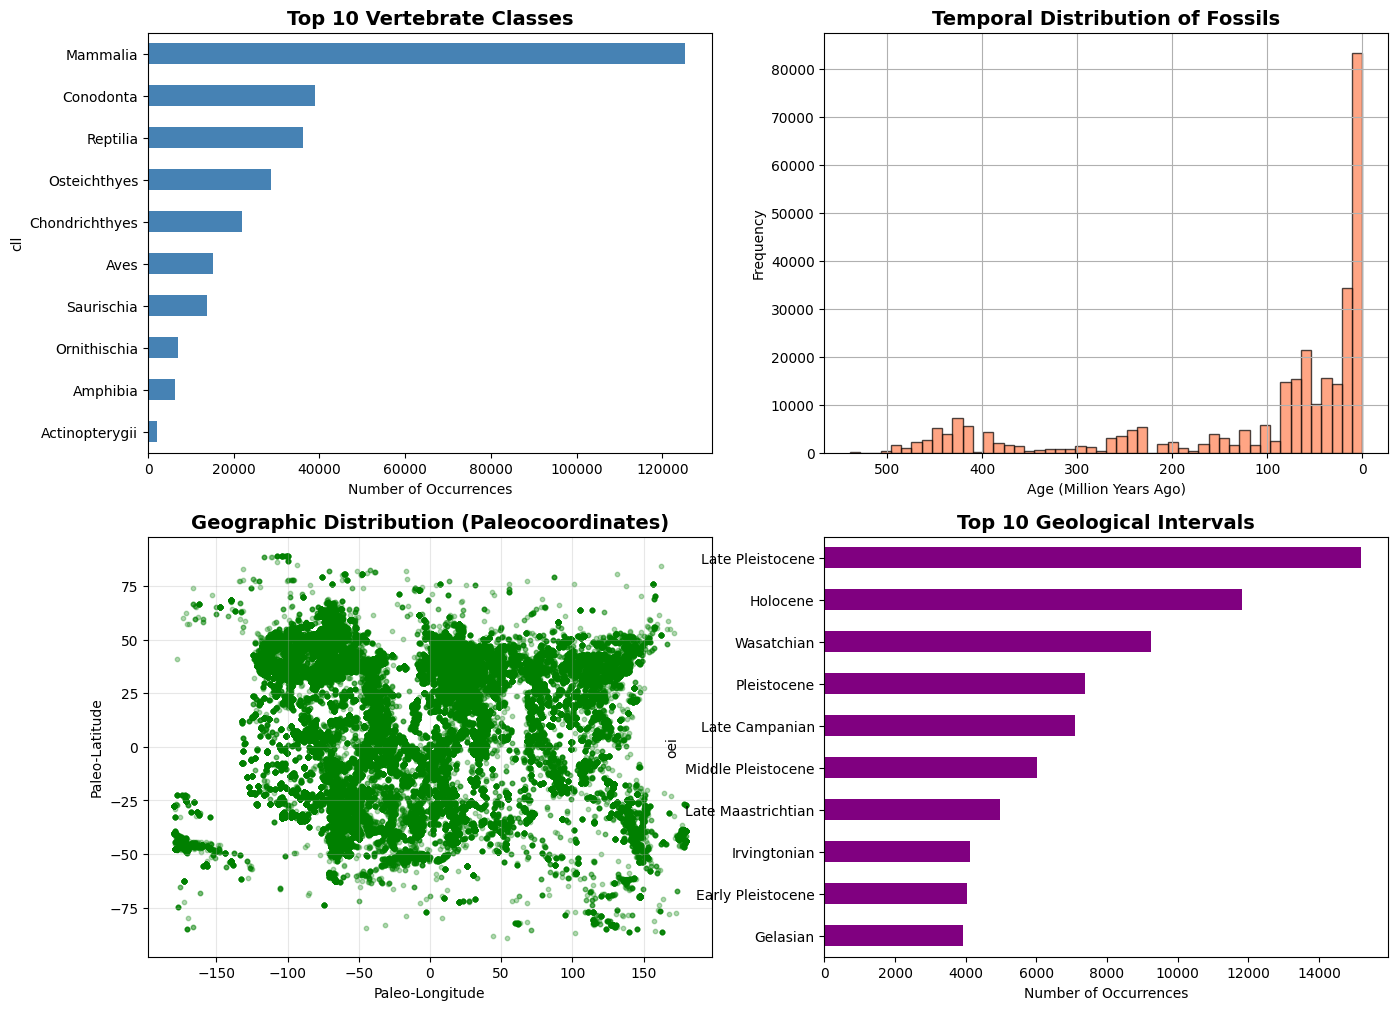

In [22]:
# ============================================================================
# STEP 7: CREATE VISUALIZATIONS
# ============================================================================
print("STEP 6: Creating Visualizations")
print("-" * 70)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# Visualization 1: Top Classes
if 'cll' in df.columns:
    ax1 = fig.add_subplot(2, 2, 1)
    top_classes = df['cll'].value_counts().head(10)
    top_classes.plot(kind='barh', ax=ax1, color='steelblue')
    ax1.set_xlabel('Number of Occurrences')
    ax1.set_title('Top 10 Vertebrate Classes', fontsize=14, fontweight='bold')
    ax1.invert_yaxis()
    print("  ✓ Created: Top Classes chart")

# Visualization 2: Temporal Distribution
if 'eag' in df.columns:
    ax2 = fig.add_subplot(2, 2, 2)
    df['eag'].dropna().hist(bins=50, ax=ax2, color='coral', edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Age (Million Years Ago)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Temporal Distribution of Fossils', fontsize=14, fontweight='bold')
    ax2.invert_xaxis()  # Older ages on the left
    print("  ✓ Created: Temporal Distribution histogram")

# Visualization 3: Geographic Distribution
if 'pln' in df.columns and 'pla' in df.columns:
    ax3 = fig.add_subplot(2, 2, 3)
    df_coords = df[['pln', 'pla']].dropna()
    if len(df_coords) > 0:
        ax3.scatter(df_coords['pln'], df_coords['pla'],
                   alpha=0.3, s=10, color='green')
        ax3.set_xlabel('Paleo-Longitude')
        ax3.set_ylabel('Paleo-Latitude')
        ax3.set_title('Geographic Distribution (Paleocoordinates)', fontsize=14, fontweight='bold')
        ax3.grid(True, alpha=0.3)
        print("  ✓ Created: Geographic Distribution scatter plot")

# Visualization 4: Top Geological Intervals
if 'eag' in df.columns:
    ax4 = fig.add_subplot(2, 2, 4)
    top_intervals = df['oei'].value_counts().head(10)
    top_intervals.plot(kind='barh', ax=ax4, color='purple')
    ax4.set_xlabel('Number of Occurrences')
    ax4.set_title('Top 10 Geological Intervals', fontsize=14, fontweight='bold')
    ax4.invert_yaxis()
    print("  ✓ Created: Top Geological Intervals chart")

In [82]:
plt.tight_layout()
fig.savefig(os.path.join(results_path,"paleobiology_eda_visualizations.png"), dpi=300, bbox_inches='tight')
print("\n✓ All visualizations saved to: paleobiology_eda_visualizations.png")
plt.show()



✓ All visualizations saved to: paleobiology_eda_visualizations.png


<Figure size 640x480 with 0 Axes>

In [10]:
!pip install cartopy

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

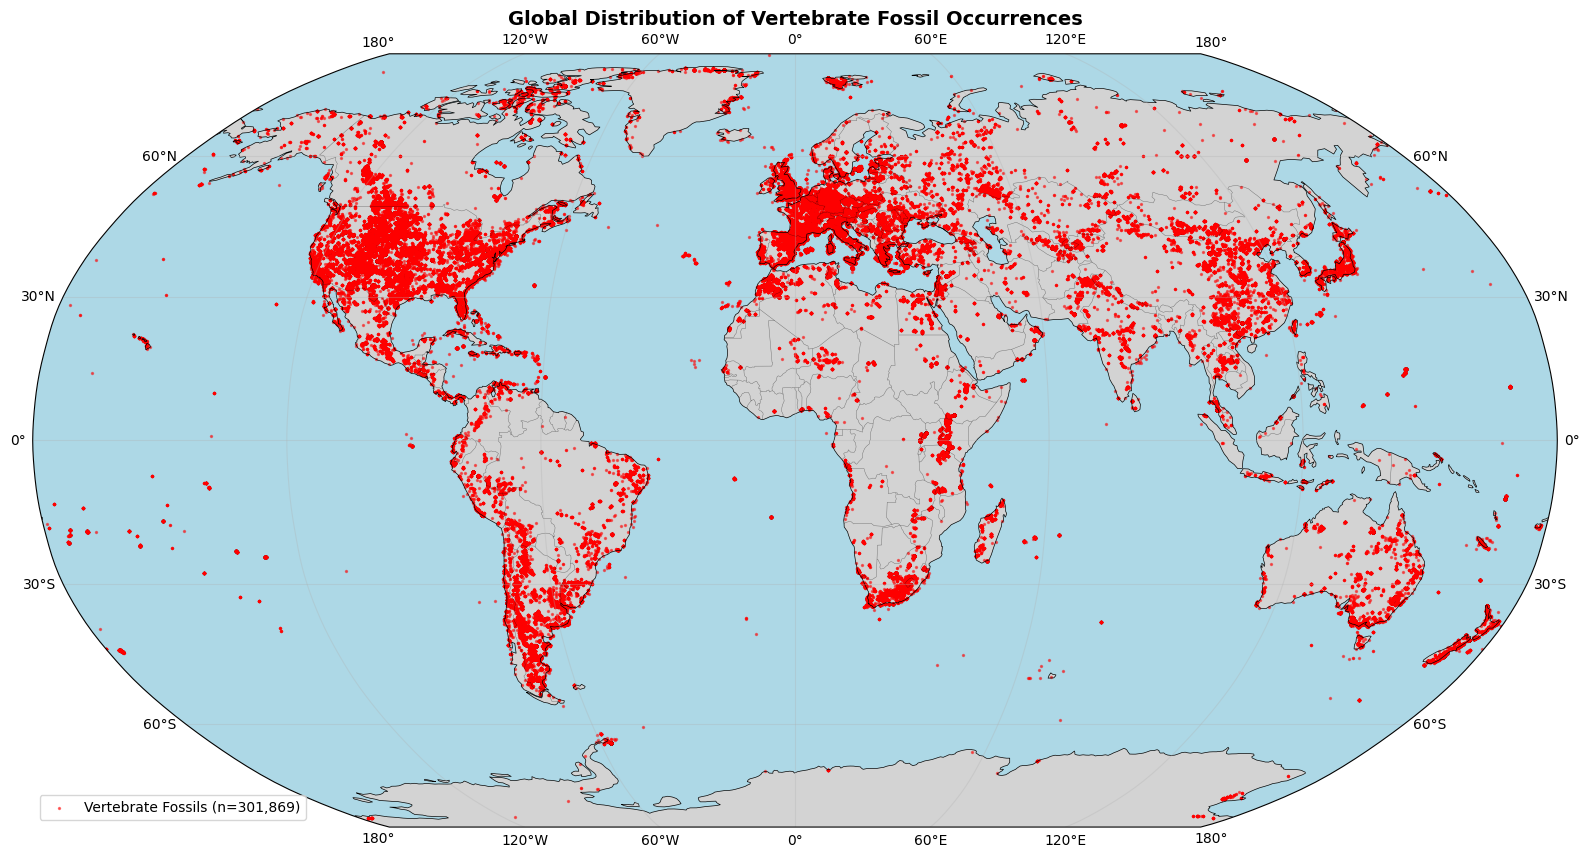

In [25]:
# Create a map with proper projection
fig, ax = plt.subplots(figsize=(16, 10),
                       subplot_kw={'projection': ccrs.Robinson()})

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3, alpha=0.5)
ax.gridlines(draw_labels=True, alpha=0.3)

# Convert coordinate columns from strings to numbers
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')

# Plot fossil occurrences
# IMPORTANT: Transform your coordinates to the map projection
ax.scatter(df['lng'], df['lat'],
           transform=ccrs.PlateCarree(),  # Your data is in lat/lon
           c='red', s=2, alpha=0.5,
           label=f'Vertebrate Fossils (n={len(df):,})')

ax.set_title('Global Distribution of Vertebrate Fossil Occurrences',
             fontsize=14, fontweight='bold')
ax.legend(loc='lower left')

plt.tight_layout()
fig.savefig(os.path.join(results_path, "global_distribution_cartopy.png"),
            dpi=300, bbox_inches='tight')
plt.show()

## Paleogeographic Maps (Using Paleolat/Paleolng)
Since you have paleocoordinates in your data, you can plot where organisms lived in the past

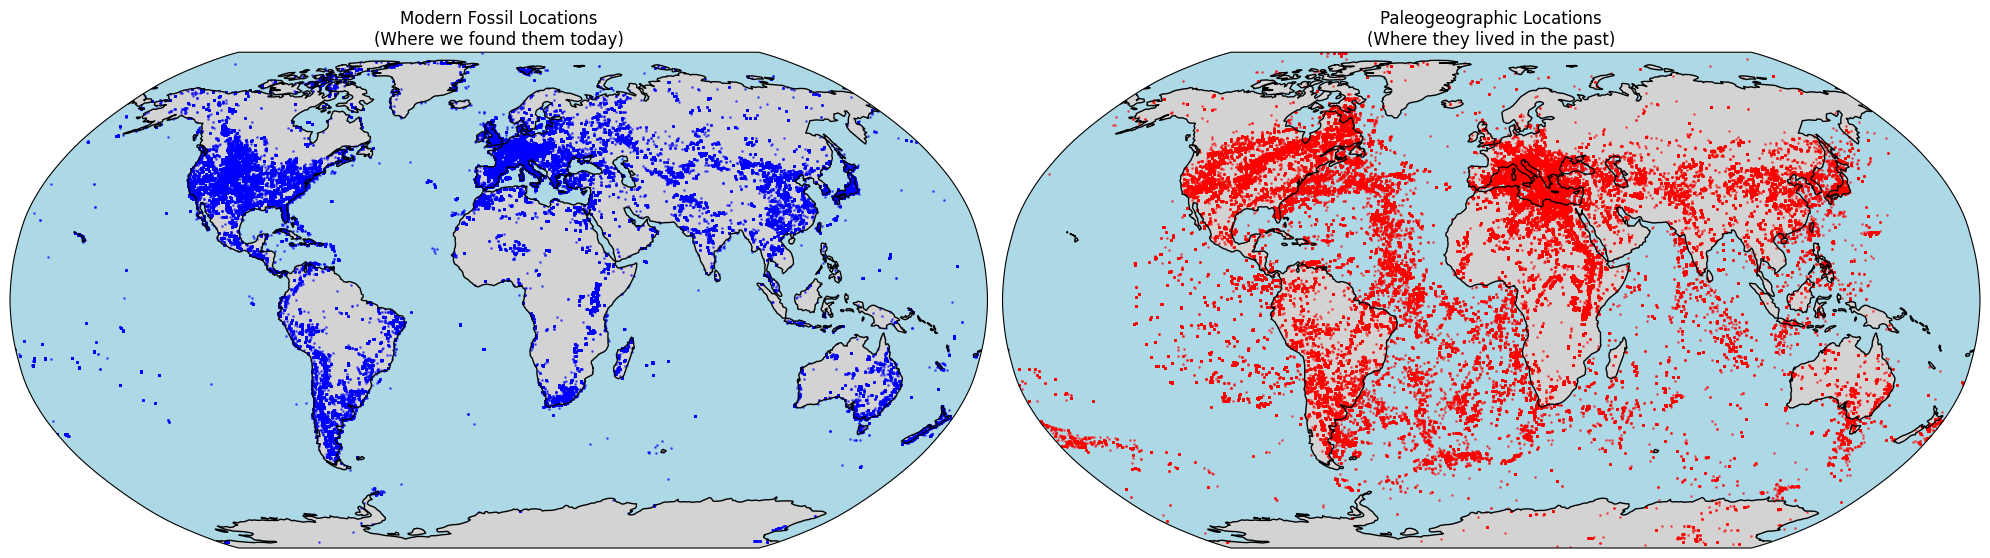

In [13]:
# Plot MODERN coordinates vs PALEO coordinates
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8),
                                subplot_kw={'projection': ccrs.Robinson()})

# Convert coordinate columns from strings to numbers
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
# Modern locations
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax1.add_feature(cfeature.COASTLINE)
ax1.scatter(df['lng'], df['lat'],
            transform=ccrs.PlateCarree(),
            c='blue', s=1, alpha=0.5)
ax1.set_title('Modern Fossil Locations\n(Where we found them today)', fontsize=12)

# Paleo locations (where they lived)
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax2.add_feature(cfeature.COASTLINE)
ax2.scatter(df_clean_paleo['paleolng'], df_clean_paleo['paleolat'],  # Using paleolng and paleolat
            transform=ccrs.PlateCarree(),
            c='red', s=1, alpha=0.5)
ax2.set_title('Paleogeographic Locations\n(Where they lived in the past)', fontsize=12)

plt.tight_layout()
fig.savefig(os.path.join(dataset_path, "modern_vs_paleo_distribution.png"),
            dpi=300, bbox_inches='tight')
plt.show()

### Visualizing Fossil Distributions Through Geological Time
Time-binned maps allow us to see:
*   Temporal patterns in fossil distribution
*   Sampling bias across different time periods
*   Biogeographic changes through deep time
*   Mass extinction effects on geographic distribution





In [15]:
# Convert age columns to numeric (if not already done)
df['eag'] = pd.to_numeric(df['eag'], errors='coerce')  # max_ma
df['lag'] = pd.to_numeric(df['lag'], errors='coerce')  # min_ma

# Calculate midpoint age for each occurrence
df['mid_age'] = (df['eag'] + df['lag']) / 2

# Define major geological periods (in millions of years)
time_bins = {
    'Quaternary': (0, 2.58),
    'Neogene': (2.58, 23.03),
    'Paleogene': (23.03, 66.0),
    'Cretaceous': (66.0, 145.0),
    'Jurassic': (145.0, 201.3),
    'Triassic': (201.3, 251.9),
    'Permian': (251.9, 298.9),
    'Carboniferous': (298.9, 358.9),
    'Devonian': (358.9, 419.2),
    'Silurian': (419.2, 443.8),
    'Ordovician': (443.8, 485.4),
    'Cambrian': (485.4, 541.0)
}

# Assign each fossil to a time bin
def assign_time_bin(age):
    if pd.isna(age):
        return 'Unknown'
    for period, (min_age, max_age) in time_bins.items():
        if min_age <= age < max_age:
            return period
    return 'Unknown'

df['time_period'] = df['mid_age'].apply(assign_time_bin)

# Check distribution
print("Fossil occurrences by geological period:")
print(df['time_period'].value_counts().sort_index())

Fossil occurrences by geological period:
time_period
Cambrian          1045
Carboniferous     4771
Cretaceous       45219
Devonian         14095
Jurassic         10273
Neogene          66757
Ordovician        8366
Paleogene        57420
Permian           6285
Quaternary       57819
Silurian         14749
Triassic         15070
Name: count, dtype: int64


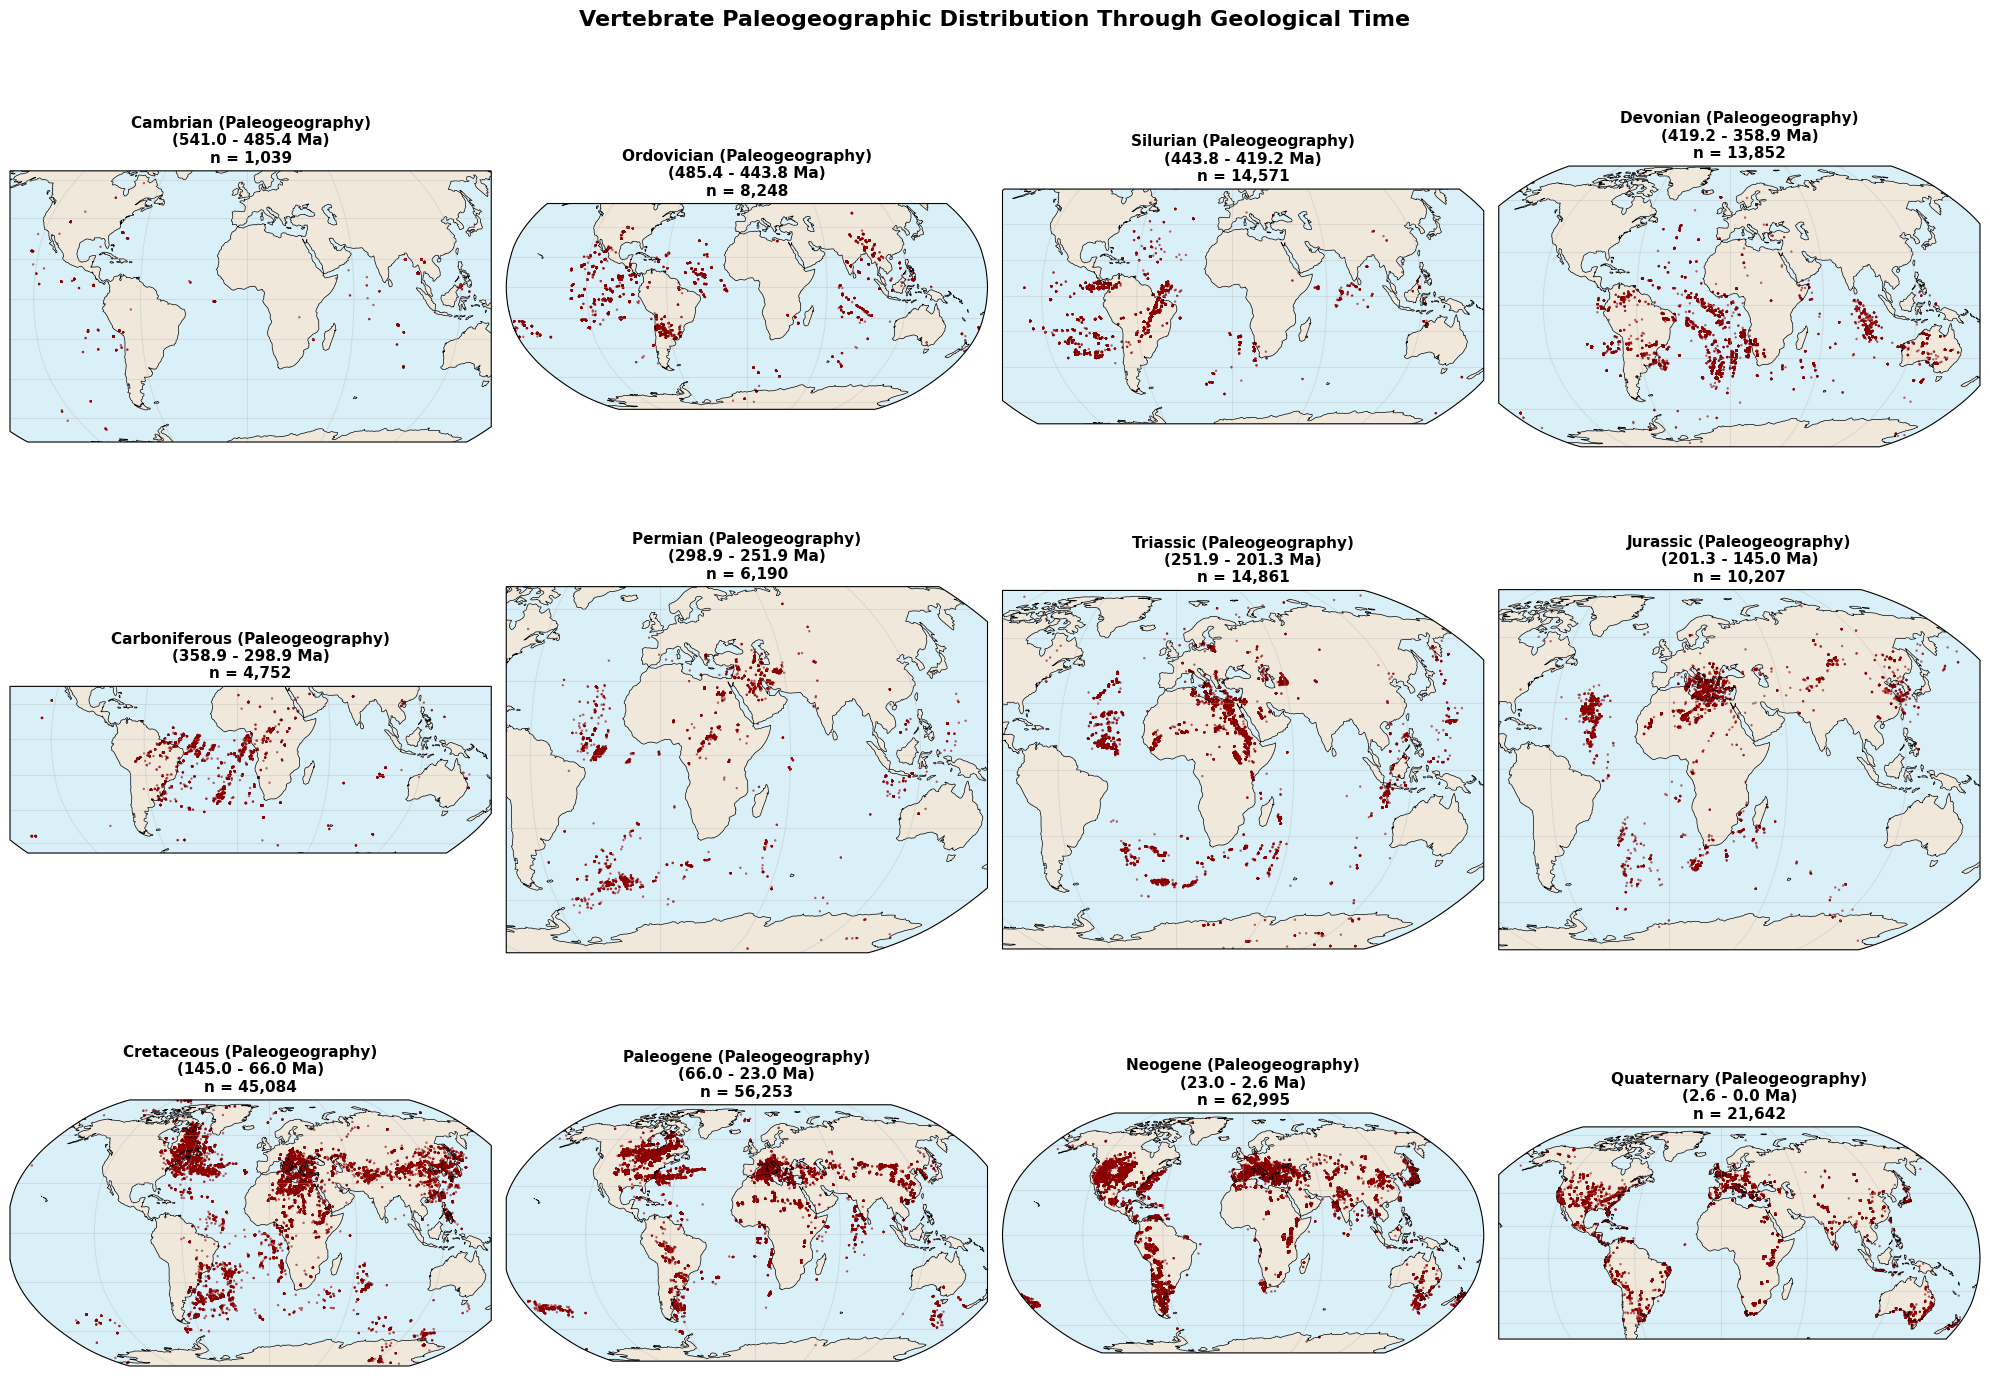

In [16]:
# Select major periods to visualize
periods_to_plot = ['Cambrian', 'Ordovician', 'Silurian', 'Devonian',
                   'Carboniferous', 'Permian', 'Triassic', 'Jurassic',
                   'Cretaceous', 'Paleogene', 'Neogene', 'Quaternary']

# Create a grid of maps
n_periods = len(periods_to_plot)
n_cols = 4
n_rows = (n_periods + n_cols - 1) // n_cols  # Ceiling division

# Filter for records with paleocoordinates
df_paleo = df[
    (df['pln'].notna()) & (df['pla'].notna()) &
    (df['pln'].between(-180, 180)) &
    (df['pla'].between(-90, 90))
].copy()

fig = plt.figure(figsize=(20, 5 * n_rows))

for idx, period in enumerate(periods_to_plot, 1):
    period_data = df_paleo[df_paleo['time_period'] == period]

    ax = fig.add_subplot(n_rows, n_cols, idx,
                         projection=ccrs.Robinson())

    ax.add_feature(cfeature.LAND, facecolor='tan', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='skyblue', alpha=0.3)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.gridlines(alpha=0.3)

    # Plot PALEOCOORDINATES
    if len(period_data) > 0:
        ax.scatter(period_data['pln'], period_data['pla'],  # paleolng, paleolat
                   transform=ccrs.PlateCarree(),
                   c='darkred', s=3, alpha=0.6, edgecolors='none')

    time_range = time_bins.get(period, ('?', '?'))
    ax.set_title(f'{period} (Paleogeography)\n'
                 f'({time_range[1]:.1f} - {time_range[0]:.1f} Ma)\n'
                 f'n = {len(period_data):,}',
                 fontsize=11, fontweight='bold')

plt.suptitle('Vertebrate Paleogeographic Distribution Through Geological Time',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()

fig.savefig(os.path.join(dataset_path, "paleogeographic_time_bins.png"),
            dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Calculate sampling through time
time_distribution = df.groupby('time_period').size().sort_values(ascending=False)
print("\nFossil occurrences by period:")
print(time_distribution)


Fossil occurrences by period:
time_period
Neogene          66757
Quaternary       57819
Paleogene        57420
Cretaceous       45219
Triassic         15070
Silurian         14749
Devonian         14095
Jurassic         10273
Ordovician        8366
Permian           6285
Carboniferous     4771
Cambrian          1045
dtype: int64


In [18]:
# ============================================================================
# STEP 8: EXPORT SUMMARY STATISTICS
# ============================================================================
print("STEP 7: Exporting Summary Statistics")
print("-" * 70)

# Create a summary report
summary_stats = {
    'Total_Records': len(df),
    'Unique_Classes': df_copy['class'].nunique() if 'class' in df_copy.columns else 0,
    'Unique_Orders': df_copy['order'].nunique() if 'order' in df_copy.columns else 0,
    'Unique_Families': df_copy['family'].nunique() if 'family' in df_copy.columns else 0,
    'Unique_Genera': df_copy['genus'].nunique() if 'genus' in df_copy.columns else 0,
    'Records_with_Coordinates': df_copy[['paleolng', 'paleolat']].notna().all(axis=1).sum() if 'paleolng' in df_copy.columns else 0,
    'Date_Range_Max_Ma': df_copy['max_ma'].max() if 'max_ma' in df_copy.columns else None,
    'Date_Range_Min_Ma': df_copy['min_ma'].min() if 'min_ma' in df_copy.columns else None,
}
summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv(os.path.join(results_path,'summary_statistics.csv'), index=False)
print("✓ Summary statistics saved to: summary_statistics.csv")

STEP 12: Exporting Summary Statistics
----------------------------------------------------------------------
✓ Summary statistics saved to: summary_statistics.csv


In [35]:
# ============================================================================
# STEP 9: PREPARE DATA FOR KNOWLEDGE GRAPH
# ============================================================================
print("STEP 8: Preparing Data for Knowledge Graph")
print("-" * 70)

# A knowledge graph shows relationships between entities
# We'll create relationships between: Class -> Order -> Family -> Genus

# A knowledge graph is a way to represent information as a network of entities
# (nodes) and their relationships (edges).

# Select relevant columns and clean data
kg_columns = ['class', 'order', 'family', 'genus', 'early_interval', 'environment']
df_kg = df_copy[kg_columns].copy()

# Remove rows with too many missing values
df_kg = df_kg.dropna(subset=['class', 'genus'], how='any')

print(f"Records suitable for knowledge graph: {len(df_kg):,}")
print("\n")

# Create relationship pairs for the knowledge graph
relationships = []

# Class -> Order relationships
if 'order' in df_kg.columns:
    class_order = df_kg[['class', 'order']].dropna().drop_duplicates()
    for _, row in class_order.iterrows():
        relationships.append({
            'source': row['class'],
            'target': row['order'],
            'relationship': 'HAS_ORDER'
        })
    print(f"✓ Created {len(class_order)} Class->Order relationships")

# Order -> Family relationships
if 'family' in df_kg.columns:
    order_family = df_kg[['order', 'family']].dropna().drop_duplicates()
    for _, row in order_family.iterrows():
        relationships.append({
            'source': row['order'],
            'target': row['family'],
            'relationship': 'HAS_FAMILY'
        })
    print(f"✓ Created {len(order_family)} Order->Family relationships")

# Family -> Genus relationships
genus_family = df_kg[['family', 'genus']].dropna().drop_duplicates()
for _, row in genus_family.iterrows():
    relationships.append({
        'source': row['family'],
        'target': row['genus'],
        'relationship': 'HAS_GENUS'
    })
print(f"✓ Created {len(genus_family)} Family->Genus relationships")

# Genus -> Time Period relationships
if 'early_interval' in df_kg.columns:
    genus_time = df_kg[['genus', 'early_interval']].dropna().drop_duplicates()
    for _, row in genus_time.iterrows():
        relationships.append({
            'source': row['genus'],
            'target': row['early_interval'],
            'relationship': 'LIVED_IN'
        })
    print(f"✓ Created {len(genus_time)} Genus->Time Period relationships")

# Genus -> Environment relationships
if 'environment' in df_kg.columns:
    genus_env = df_kg[['genus', 'environment']].dropna().drop_duplicates()
    for _, row in genus_env.iterrows():
        relationships.append({
            'source': row['genus'],
            'target': row['environment'],
            'relationship': 'FOUND_IN'
        })
    print(f"✓ Created {len(genus_env)} Genus->Environment relationships")

# Convert to DataFrame
relationships_df = pd.DataFrame(relationships)
print(f"\n✓ Total relationships in knowledge graph: {len(relationships_df):,}")

# Save the knowledge graph data
relationships_df.to_csv(os.path.join(results_path,'knowledge_graph_relationships.csv'), index=False)
print("✓ Knowledge graph saved to: knowledge_graph_relationships.csv")

Records suitable for knowledge graph: 246,892


✓ Created 448 Class->Order relationships
✓ Created 2775 Order->Family relationships
✓ Created 17989 Family->Genus relationships
✓ Created 57121 Genus->Time Period relationships
✓ Created 49315 Genus->Environment relationships

✓ Total relationships in knowledge graph: 127,648
✓ Knowledge graph saved to: knowledge_graph_relationships.csv


In [51]:
# Remove all "NO_*_SPECIFIED" patterns from both columns
unwanted_values = [
    'NO_CLASS_SPECIFIED',
    'NO_ORDER_SPECIFIED',
    'NO_FAMILY_SPECIFIED',
    'NO_GENUS_SPECIFIED'
]

relationships_df = relationships_df[
    ~relationships_df['source'].isin(unwanted_values) &
    ~relationships_df['target'].isin(unwanted_values)
]

STEP 8: Preparing Data for Knowledge Graph
----------------------------------------------------------------------


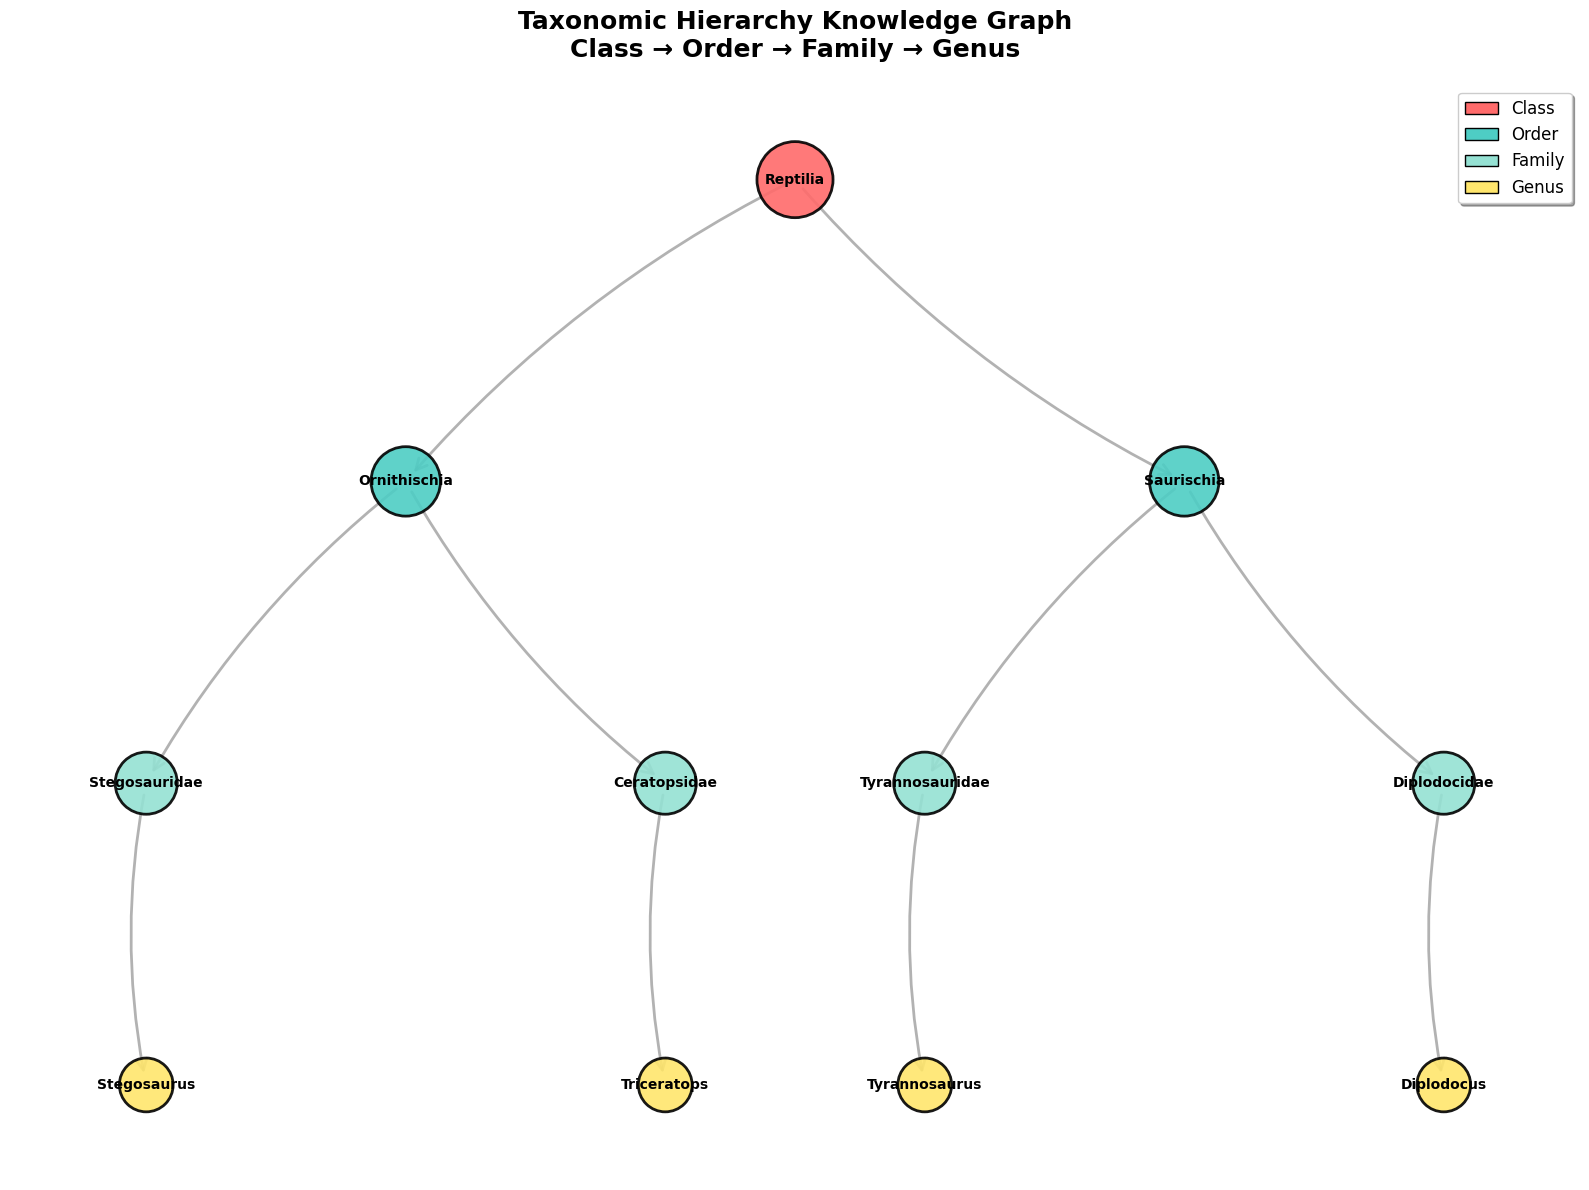

In [34]:
# ============================================================================
# STEP 10: VISUALIZE KNOWLEDGE GRAPH (SAMPLE)
# ============================================================================
print("STEP 9: Creating Sample Knowledge Graph Visualization")
print("-" * 70)
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample taxonomic hierarchy for demonstration
# Using a classic paleontology example: Dinosauria
sample_relationships = [
    # Class -> Order
    ('Reptilia', 'Ornithischia', 'has_order'),
    ('Reptilia', 'Saurischia', 'has_order'),

    # Order -> Family
    ('Ornithischia', 'Stegosauridae', 'has_family'),
    ('Ornithischia', 'Ceratopsidae', 'has_family'),
    ('Saurischia', 'Tyrannosauridae', 'has_family'),
    ('Saurischia', 'Diplodocidae', 'has_family'),

    # Family -> Genus
    ('Stegosauridae', 'Stegosaurus', 'has_genus'),
    ('Ceratopsidae', 'Triceratops', 'has_genus'),
    ('Tyrannosauridae', 'Tyrannosaurus', 'has_genus'),
    ('Diplodocidae', 'Diplodocus', 'has_genus'),
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to graph
for source, target, relation in sample_relationships:
    G.add_edge(source, target, relation=relation)

# Create visualization with hierarchical layout
plt.figure(figsize=(16, 12))

# Use hierarchical layout for better taxonomy visualization
pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

# Alternatively, create a more structured hierarchical layout
# Define levels manually for clearer hierarchy
levels = {
    'Reptilia': (0, 3),
    'Ornithischia': (-1.5, 2),
    'Saurischia': (1.5, 2),
    'Stegosauridae': (-2.5, 1),
    'Ceratopsidae': (-0.5, 1),
    'Tyrannosauridae': (0.5, 1),
    'Diplodocidae': (2.5, 1),
    'Stegosaurus': (-2.5, 0),
    'Triceratops': (-0.5, 0),
    'Tyrannosaurus': (0.5, 0),
    'Diplodocus': (2.5, 0),
}

# Color nodes by taxonomic level
node_colors = []
for node in G.nodes():
    if node == 'Reptilia':
        node_colors.append('#FF6B6B')  # Red for Class
    elif node in ['Ornithischia', 'Saurischia']:
        node_colors.append('#4ECDC4')  # Teal for Order
    elif node in ['Stegosauridae', 'Ceratopsidae', 'Tyrannosauridae', 'Diplodocidae']:
        node_colors.append('#95E1D3')  # Light green for Family
    else:
        node_colors.append('#FFE66D')  # Yellow for Genus

# Draw nodes with different sizes based on level
node_sizes = []
for node in G.nodes():
    if node == 'Reptilia':
        node_sizes.append(3000)  # Largest for Class
    elif node in ['Ornithischia', 'Saurischia']:
        node_sizes.append(2500)
    elif node in ['Stegosauridae', 'Ceratopsidae', 'Tyrannosauridae', 'Diplodocidae']:
        node_sizes.append(2000)
    else:
        node_sizes.append(1500)  # Smallest for Genus

nx.draw_networkx_nodes(G, levels, node_color=node_colors,
                      node_size=node_sizes, alpha=0.9, edgecolors='black', linewidths=2)

# Draw edges
nx.draw_networkx_edges(G, levels, edge_color='gray',
                      arrows=True, arrowsize=20, alpha=0.6,
                      arrowstyle='->', width=2, connectionstyle='arc3,rad=0.1')

# Draw labels with better formatting
nx.draw_networkx_labels(G, levels, font_size=10, font_weight='bold', font_family='sans-serif')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF6B6B', edgecolor='black', label='Class'),
    Patch(facecolor='#4ECDC4', edgecolor='black', label='Order'),
    Patch(facecolor='#95E1D3', edgecolor='black', label='Family'),
    Patch(facecolor='#FFE66D', edgecolor='black', label='Genus')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12, frameon=True, shadow=True)

plt.title('Taxonomic Hierarchy Knowledge Graph\nClass → Order → Family → Genus',
         fontsize=18, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()

# Save the figure
output_file = os.path.join(results_path, 'knowledge_graph_sample.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')

Creating sample graph for class: Mammalia
✓ Sample knowledge graph created with 201 nodes and 200 edges
✓ Saved to: knowledge_graph_sample.png


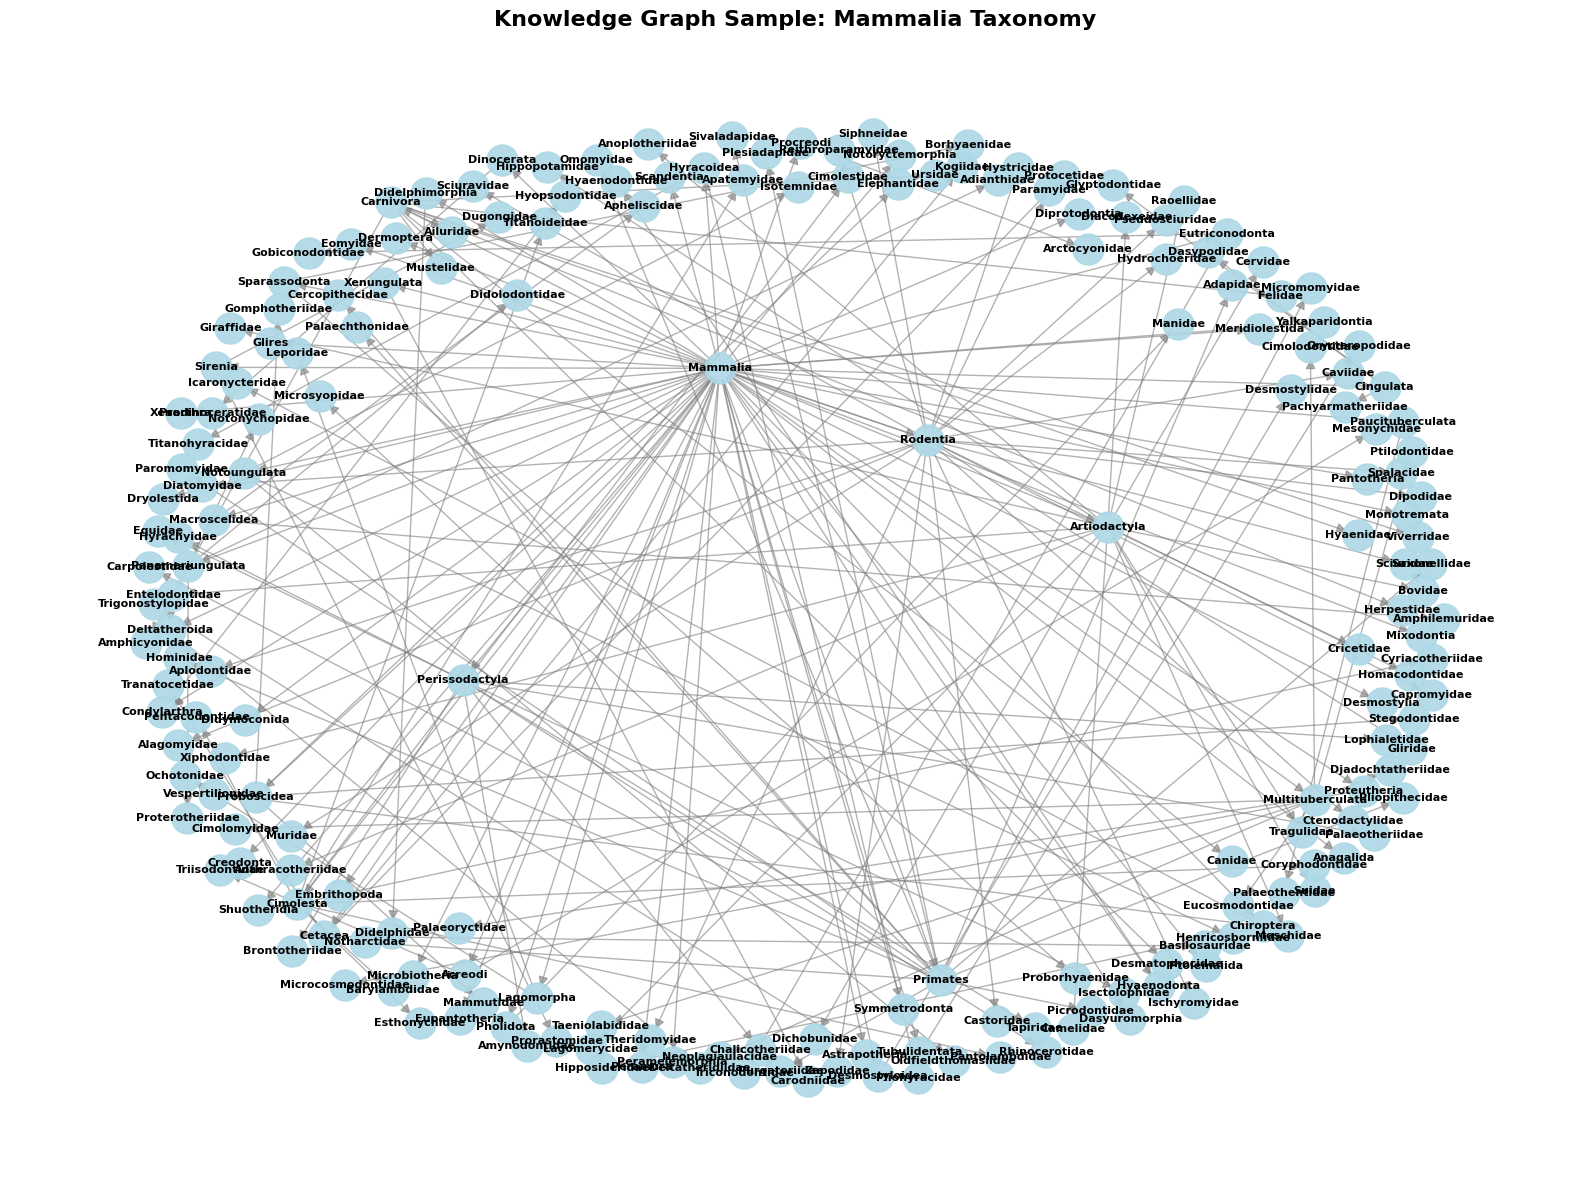

In [54]:
# For demonstration, we'll create a small subgraph focused on one class
# Let's pick the most common class

if 'class' in df_kg.columns and len(relationships_df) > 0:
    most_common_class = df_kg['class'].value_counts().index[0]
    print(f"Creating sample graph for class: {most_common_class}")

    # Import network visualization library
    try:
        import networkx as nx

        # Create a directed graph
        G = nx.DiGraph()

        # Filter relationships for this class
        class_rels = relationships_df[
            (relationships_df['source'] == most_common_class) |
            (relationships_df['source'].isin(
                relationships_df[relationships_df['source'] == most_common_class]['target']
            ))
        ].head(200)  # Limit to 200 relationships for clarity

        # Add edges to graph
        for _, row in class_rels.iterrows():
            G.add_edge(row['source'], row['target'], relation=row['relationship'])

        # Create visualization
        plt.figure(figsize=(16, 12))

        # Position nodes using spring layout
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                              node_size=500, alpha=0.9)

        # Draw edges
        nx.draw_networkx_edges(G, pos, edge_color='gray',
                              arrows=True, arrowsize=15, alpha=0.6)

        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

        plt.title(f'Knowledge Graph Sample: {most_common_class} Taxonomy',
                 fontsize=16, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(os.path.join(results_path,'knowledge_graph_sample.png'), dpi=300, bbox_inches='tight')

        print(f"✓ Sample knowledge graph created with {len(G.nodes())} nodes and {len(G.edges())} edges")
        print("✓ Saved to: knowledge_graph_sample.png")

    except ImportError:
        print("Note: networkx library not available for graph visualization")
        print("You can install it with: pip install networkx")

In [65]:
if 'class' in df_kg.columns and len(relationships_df) > 0:
    most_common_class = df_kg['class'].value_counts().index[0]
    print(f"Creating sample graph for class: {most_common_class}")

    # Create a directed graph
    GX = nx.DiGraph()

    # Filter relationships for this class
    class_rels = relationships_df[
        (relationships_df['source'] == most_common_class) |
        (relationships_df['source'].isin(
            relationships_df[relationships_df['source'] == most_common_class]['target']
        ))
    ]#.head(200)  # Limit to 200 relationships for clarity

    # Add edges to graph
    for _, row in class_rels.iterrows():
        GX.add_edge(row['source'], row['target'], relation=row['relationship'])

    print(f"✓ Knowledge graph created with {len(GX.nodes())} nodes and {len(GX.edges())} edges")

Creating sample graph for class: Mammalia
✓ Knowledge graph created with 549 nodes and 548 edges


In [66]:
# ============================================================================
# PART 11: QUERY EXAMPLES
# ============================================================================
print("PART 10: Querying the Knowledge Graph")
print("-" * 80)
print("Now that we have a knowledge graph, we can ask questions!\n")

# Query 1: What orders belong to Mammalia?
if 'Mammalia' in GX.nodes():
    mammals_orders = list(GX.successors('Mammalia'))
    print(f"Q1: What orders belong to Mammalia?")
    print(f"A1: {', '.join(mammals_orders)}\n")

# Query 2: What genus belongs to Felidae?
if 'Felidae' in GX.nodes():
    felidae_genera = list(GX.successors('Felidae'))
    print(f"Q2: What genera belong to Felidae?")
    print(f"A2: {', '.join(felidae_genera)}\n")

# Query 3: Trace the full lineage of a genus
if 'Panthera' in GX.nodes():
    print(f"Q3: What is the full taxonomic lineage of Panthera?")
    print("A3: Tracing backwards...")

    current = 'Panthera'
    lineage = [current]

    while list(GX.predecessors(current)):
        predecessor = list(GX.predecessors(current))[0]
        edge_data = GX.get_edge_data(predecessor, current)
        if edge_data and edge_data.get('category') == 'TAXONOMIC':
            lineage.append(predecessor)
            current = predecessor
        else:
            break

    print(f"    {' ← '.join(reversed(lineage))}\n")

PART 10: Querying the Knowledge Graph
--------------------------------------------------------------------------------
Now that we have a knowledge graph, we can ask questions!

Q1: What orders belong to Mammalia?
A1: Artiodactyla, Cetacea, Sirenia, Rodentia, Carnivora, Chiroptera, Cimolesta, Perissodactyla, Lagomorpha, Primates, Proboscidea, Hyracoidea, Panameriungulata, Desmostyloidea, Tubulidentata, Didelphimorphia, Cingulata, Pholidota, Multituberculata, Deltatheroida, Sparassodonta, Xenungulata, Notoungulata, Astrapotheria, Paucituberculata, Eutriconodonta, Procreodi, Creodonta, Condylarthra, Acreodi, Proteutheria, Macroscelidea, Dermoptera, Dinocerata, Hyaenodonta, Xenarthra, Diprotodontia, Dasyuromorphia, Peramelemorphia, Monotremata, Peramura, Embrithopoda, Meridiolestida, Mixodontia, Glires, Pantotheria, Desmostylia, Symmetrodonta, Shuotheridia, Dryolestida, Didymoconida, Anagalida, Scandentia, Eupantotheria, Microbiotheria, Yalkaparidontia, Notoryctemorphia, Ptolemaiida

Q2: 

In [67]:
# Query 4: What environments do Mammalia occupy?
if 'Mammalia' in GX.nodes():
    print(f"Q4: What environments are associated with Mammalia?")

    # Get all genera under Mammalia
    mammalia_genera = []
    for order in GX.successors('Mammalia'):
        for family in GX.successors(order):
            for genus in GX.successors(family):
                mammalia_genera.append(genus)



    print(f"A4: {', '.join(mammalia_genera)}\n")

Q4: What environments are associated with Mammalia?
A4: 



In [62]:
G.successors('Mammalia')

In [5]:
with open('world.geojson', 'r') as f:
    world = json.load(f)


def draw_world(ax):
    patches = []
    for feature in world["features"]:
        geom = feature["geometry"]
        if geom["type"] == "Polygon":
            coords = geom["coordinates"][0]
            poly = Polygon(coords, closed=True)
            patches.append(poly)
        elif geom["type"] == "MultiPolygon":
            for poly_coords in geom["coordinates"]:
                poly = Polygon(poly_coords[0], closed=True)
                patches.append(poly)

    ax.add_collection(PatchCollection(patches, facecolor="lightgray",
                                      edgecolor="black", linewidths=0.3, alpha=0.7))
    ax.set_xlim(-180, 180)
    ax.set_ylim(-90, 90)

In [7]:
pb_records.head()

oid     cid         tna  rnk        tid           oei    eag    lag  \
0   occ:65  col:30  Gondolella    5  txn:33930  Desmoinesian  312.8  306.0   
1  occ:201  col:75  Vertebrata   19  txn:67149  Desmoinesian  312.8  306.0   
2  occ:269  col:83  Vertebrata   19  txn:67149  Desmoinesian  312.8  306.0   
3  occ:282  col:85  Vertebrata   19  txn:67149  Desmoinesian  312.8  306.0   
4  occ:289  col:86  Vertebrata   19  txn:67149  Desmoinesian  312.8  306.0   

                           aut   pby  ... ctno  ccr altv altu  jth  ccs  pl1  \
0  von Bitter and Merrill 1998  1998  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1      Malinky and Heckel 1998  1998  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2      Malinky and Heckel 1998  1998  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3      Malinky and Heckel 1998  1998  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4      Malinky and Heckel 1998  1998  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   idf  rsf  jsr  
0  NaN  NaN  NaN  
1  NaN  NaN  NaN  
2  NaN  NaN  NaN  
3  NaN  NaN  NaN  
4  NaN  NaN  NaN  

[5 rows x 138 columns]

In [8]:

# ===================================================================
# 0. LOAD JSON ORIGINAL
# ===================================================================

pb_records_copy = pb_records.copy()


# ===================================================================
# 2. REMOVE RECORDS WITHOUT COUNTRY
# ===================================================================

pb_records_copy = pb_records_copy.dropna(subset=["cc2"])
pb_records_copy = pb_records_copy[pb_records_copy["cc2"] != ""]


# ===================================================================
# 3. REMOVE REDUNDANT INFORMATION (same species, country, age)
# ===================================================================

pb_records_copy = pb_records_copy.drop_duplicates(subset=["ids", "cc2", "oei"])


# ===================================================================
# 4. REMOVE GENERA RESTRICTED TO A SINGLE REGION
# ===================================================================

genus_region_count = pb_records_copy.groupby("gnl")["cc2"].nunique()
valid_genus_cc2 = genus_region_count[genus_region_count >= 2].index
pb_records_copy = pb_records_copy[pb_records_copy["gnl"].isin(valid_genus_cc2)]


# ===================================================================
# 5. REMOVE GENERA WITH DUBIOUS OLDEST OCCURRENCE
# ===================================================================

earliest_occurrence = pb_records_copy.groupby("gnl")["eag"].max().reset_index()
pb_records_earliest = pb_records_copy.merge(earliest_occurrence, on=["gnl", "eag"])
origin_counts = pb_records_earliest.groupby("gnl")["cc2"].nunique()
valid_genus_earliest = origin_counts[origin_counts == 1].index
pb_records_copy = pb_records_copy[pb_records_copy["gnl"].isin(valid_genus_earliest)]


# ===================================================================
# 1. (FINAL) REMOVE GENERA WITH LESS THAN 2 SPECIES
# ===================================================================

genus_species_count = pb_records_copy.groupby("gnl")["ids"].nunique()
valid_genus = genus_species_count[genus_species_count >= 2].index
pb_records_copy = pb_records_copy[pb_records_copy["gnl"].isin(valid_genus)]



In [9]:
countries = pb_records_copy["cc2"].unique()
print(countries)


['US' 'CA' 'CN' 'CG' 'CH' 'FR' 'NL' 'UK' 'JO' 'RU' 'CZ' 'EG' 'AU' 'NO'
 'AR' 'MX' 'MN' 'KZ' 'IN' 'TR' 'IL' 'PS' 'BO' 'AQ' 'NC' 'CU' 'ZA' 'ES'
 'RO' 'LS' 'PE' 'LK' 'JP' 'PK' 'IR' 'CO' 'UY' 'ID' 'SE' 'EE' 'UA' 'AT'
 'MA' 'TJ' 'TH' 'KP' 'GT' 'SV' 'PA' 'HN' 'GL' 'CR' 'UZ' 'KE' 'ET' 'VE'
 'BR' 'TZ' 'CI' 'ZM' 'NA' 'SD' 'SZ' 'TD' 'CD' 'UG' 'MW' 'DJ' 'DZ' 'BE'
 'ZW' 'DE' 'EC' 'LY' 'TN' 'IT' 'DO' 'AE' 'PL' 'KG' 'GR' 'HU' 'PT' 'NZ'
 'SK' 'SY' 'LB' 'DK' 'MD' 'PG' 'SI' 'VI' 'SA' 'CL' 'PR' 'TM' 'RS' 'GE'
 'PH' 'HR' 'MM' 'IQ' 'AF' 'BA' 'OM' 'AZ' 'MG' 'AM' 'ML' 'NP' 'NE' 'SO'
 'O5' 'KR' 'O6' 'LU' 'AO' 'BG' 'O2' 'JM' 'CY' 'PF' 'FJ' 'UM' 'NI' 'PY'
 'TW' 'YE' 'IE' 'O3' 'TG' 'NG' 'BM' 'VN' 'VU' 'MT' 'CV' 'LV' 'LT' 'AG'
 'EH' 'O4' 'BQ' 'CW' 'IS' 'SJ' 'LA' 'IM' 'GI' 'JE' 'FO' 'GQ' 'SN' 'MY'
 'KY' 'BS' 'BB' 'GD' 'LR' 'O1' 'MZ' 'SH' 'SB' 'AX' 'HT' 'GP' 'BZ' 'KN'
 'TC' 'VG' 'MK' 'ER' 'AI' 'MC' 'SC' 'CK' 'PN' 'WF' 'AS' 'NU' 'TO' 'RE'
 'MU' 'MQ' 'BN' 'NF' 'MS' 'FA' 'TF' 'MP' 'FM' 'MH' 'TL' 'GU' 'FI' 'AW'
 'VA' 

In [10]:
def classify_paleo_unit(row):
    """
    Classify country into paleobiogeographic units based on country code and paleolongitude (for Russia).
    """
    country = row['cc2']
    lon = float(row['lng'])

    # Russia split by longitude
    if country == "RU":
        return "Europe" if lon <= 60 else "Asia"

    # Dictionary mapping country codes to regions
    country_to_region = {
        # North America
        "US":"North America", "CA":"North America", "MX":"North America",
        # South America
        "BR":"South America", "AR":"South America", "CL":"South America", "PE":"South America",
        "BO":"South America", "UY":"South America", "PY":"South America", "VE":"South America",
        "CO":"South America", "EC":"South America", "GF":"South America", "SR":"South America", "GY":"South America",
        # Europe
        "FR":"Europe", "DE":"Europe", "IT":"Europe", "PL":"Europe", "GB":"Europe", "UK":"Europe",
        "NO":"Europe", "SE":"Europe", "FI":"Europe", "UA":"Europe", "RO":"Europe", "BG":"Europe",
        "GR":"Europe", "CZ":"Europe", "NL":"Europe", "BE":"Europe", "CH":"Europe", "AT":"Europe",
        "DK":"Europe", "HU":"Europe", "SK":"Europe", "SI":"Europe", "IE":"Europe", "IS":"Europe",
        # Iberia
        "PT":"Iberia", "ES":"Iberia",
        # Asia
        "CN":"Asia", "MN":"Asia", "JP":"Asia", "KR":"Asia", "KP":"Asia", "KZ":"Asia",
        "UZ":"Asia", "TM":"Asia", "TJ":"Asia", "KG":"Asia", "IR":"Asia", "IQ":"Asia", "SY":"Asia",
        "TR":"Asia", "ID":"Asia", "PH":"Asia", "PK":"Asia", "AF":"Asia", "LK":"Asia", "MM":"Asia",
        "TH":"Asia", "VN":"Asia", "TL":"Asia", "BN":"Asia", "MY":"Asia", "SG":"Asia",
        # Arabia
        "SA":"Arabia", "OM":"Arabia", "YE":"Arabia", "AE":"Arabia", "QA":"Arabia", "BH":"Arabia", "KW":"Arabia",
        # Africa
        "ZA":"Africa", "NA":"Africa", "BW":"Africa", "AO":"Africa", "CD":"Africa", "EG":"Africa",
        "MA":"Africa", "TN":"Africa", "LY":"Africa", "NG":"Africa", "KE":"Africa", "TZ":"Africa",
        "ET":"Africa", "DZ":"Africa", "CI":"Africa", "ZM":"Africa", "SD":"Africa", "SZ":"Africa",
        "UG":"Africa", "MW":"Africa", "LR":"Africa", "SN":"Africa", "ML":"Africa", "SO":"Africa",
        "DJ":"Africa", "EH":"Africa", "CM":"Africa", "GQ":"Africa", "CV":"Africa", "MG":"Madagascar",
        # India
        "IN":"India",
        # Australia
        "AU":"Australia", "NZ":"Australia",
        # Antarctica
        "AQ":"Antarctica",
        # Caribbean
        "CU":"Caribbean", "HT":"Caribbean", "DO":"Caribbean", "JM":"Caribbean",
        "TT":"Caribbean", "GD":"Caribbean", "LC":"Caribbean", "BB":"Caribbean", "BS":"Caribbean"
    }

    return country_to_region.get(country, "Other")


# Aplicar aos dados
pb_records_copy["paleo_unit"] = pb_records_copy.apply(classify_paleo_unit, axis=1)
pb_records_copy["lat"] = pd.to_numeric(pb_records_copy["lat"], errors='coerce')
pb_records_copy["lng"] = pd.to_numeric(pb_records_copy["lng"], errors='coerce')


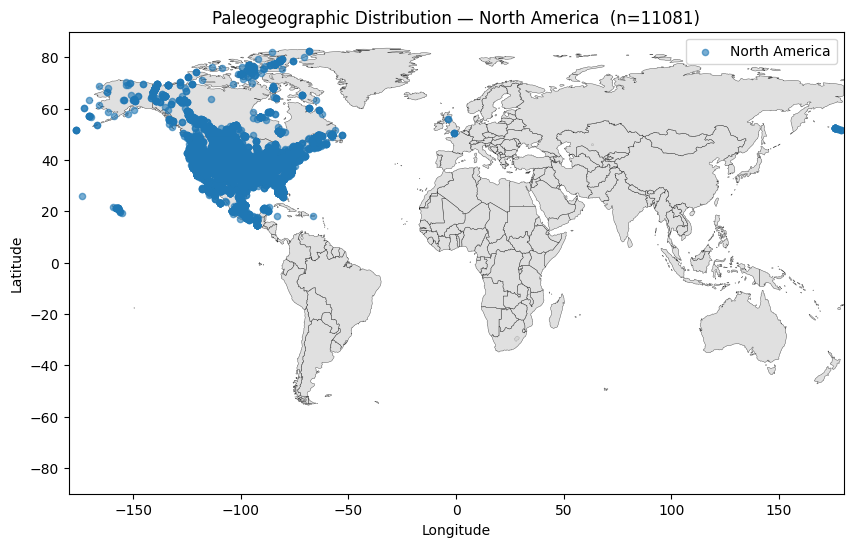

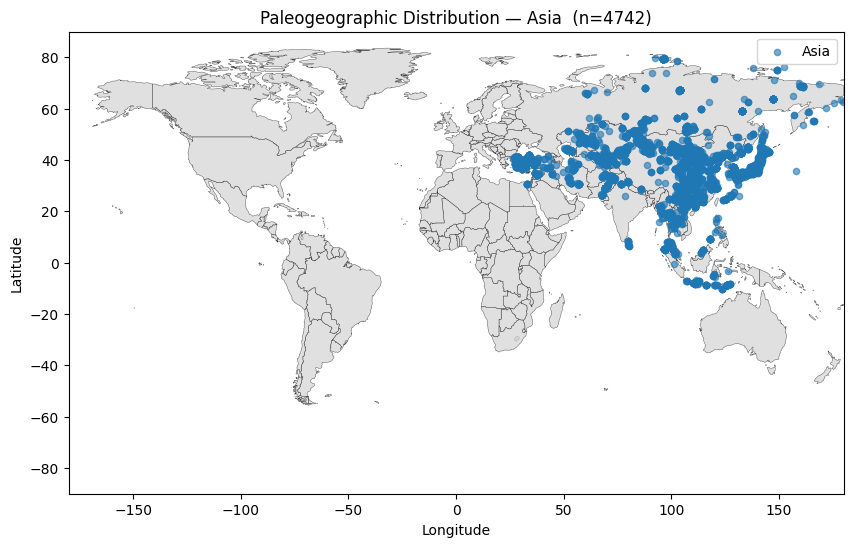

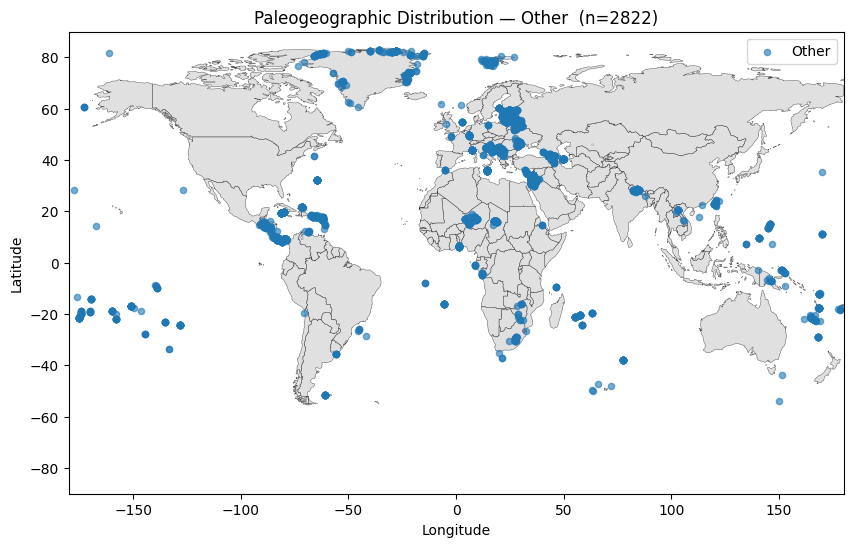

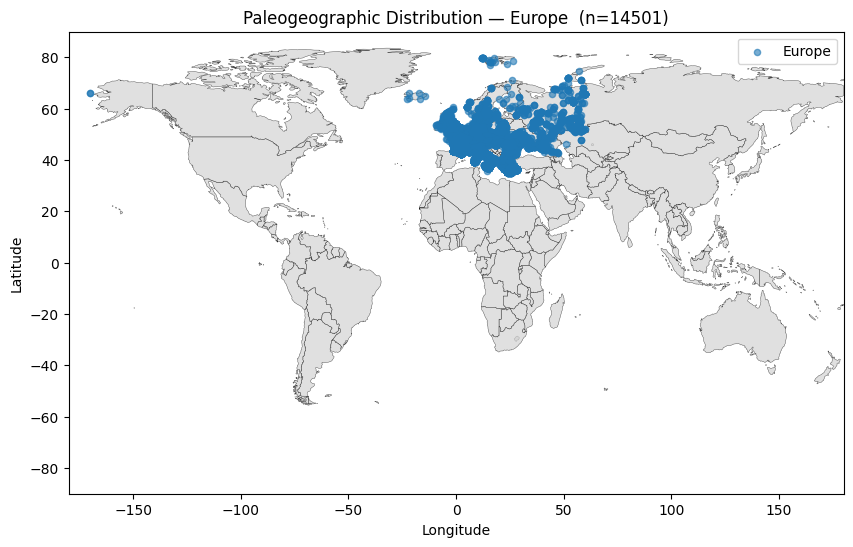

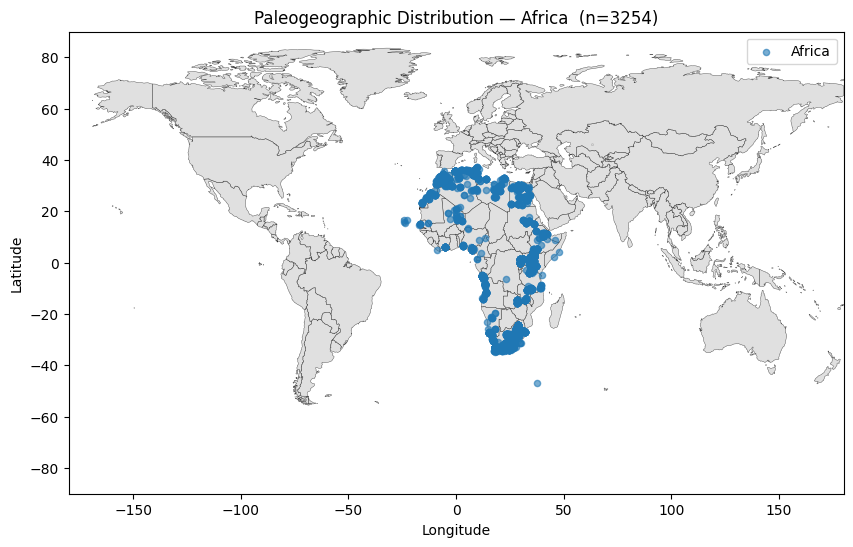

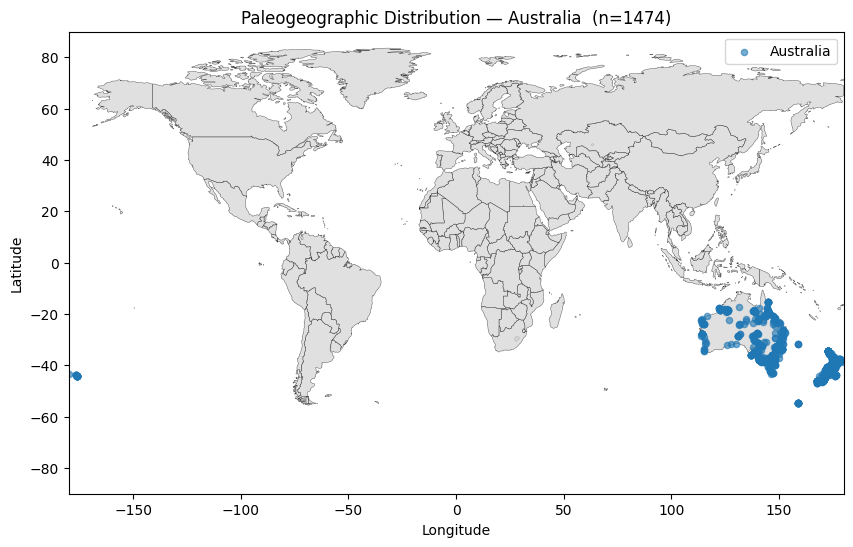

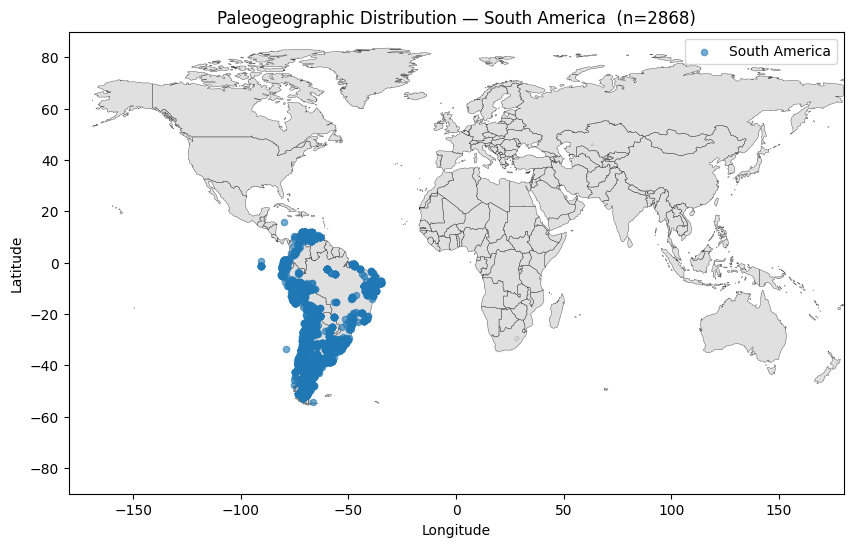

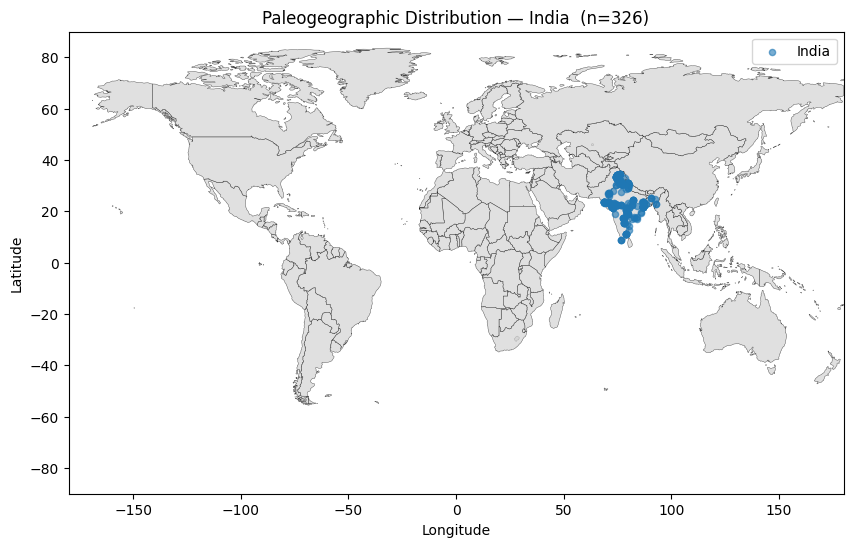

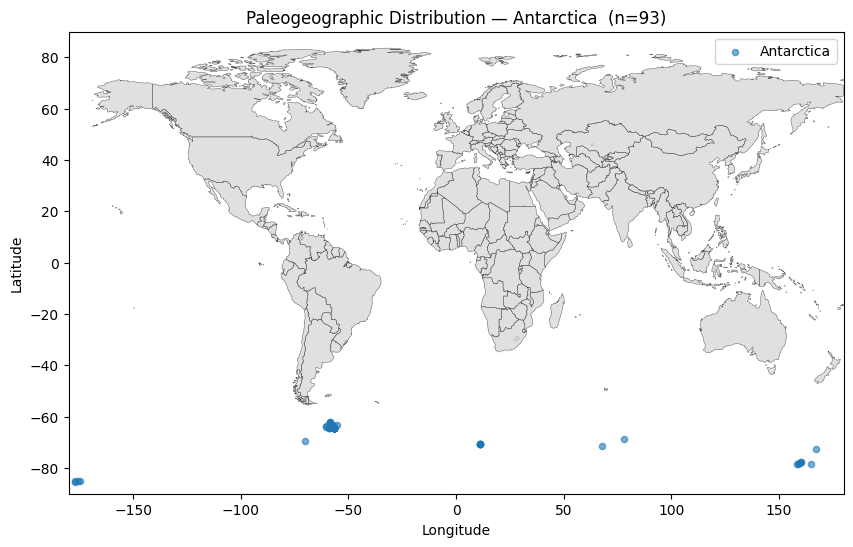

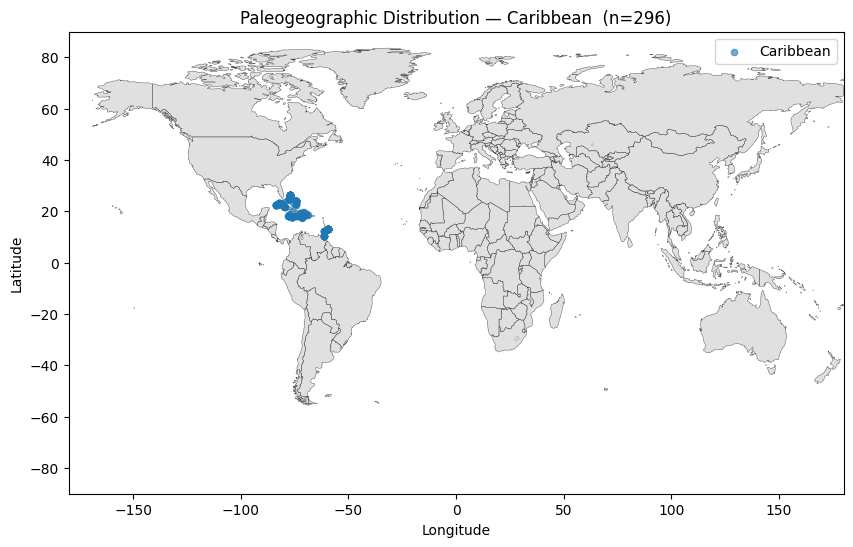

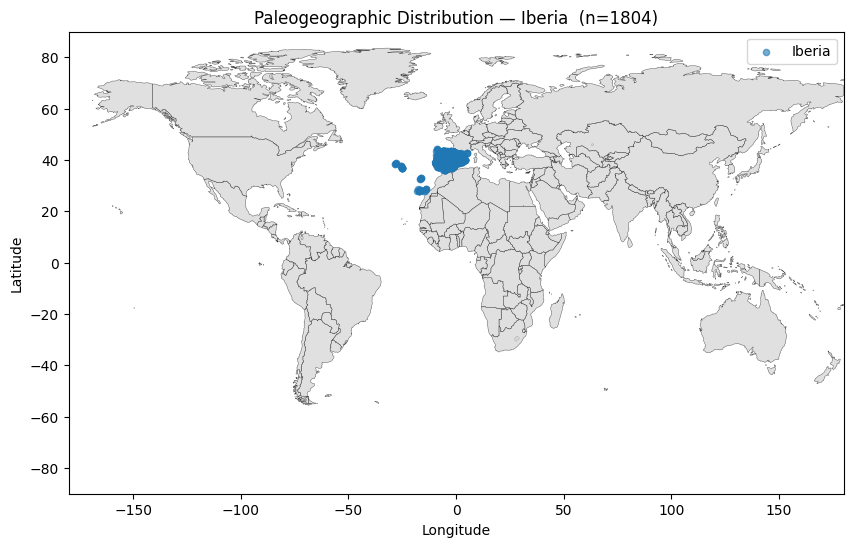

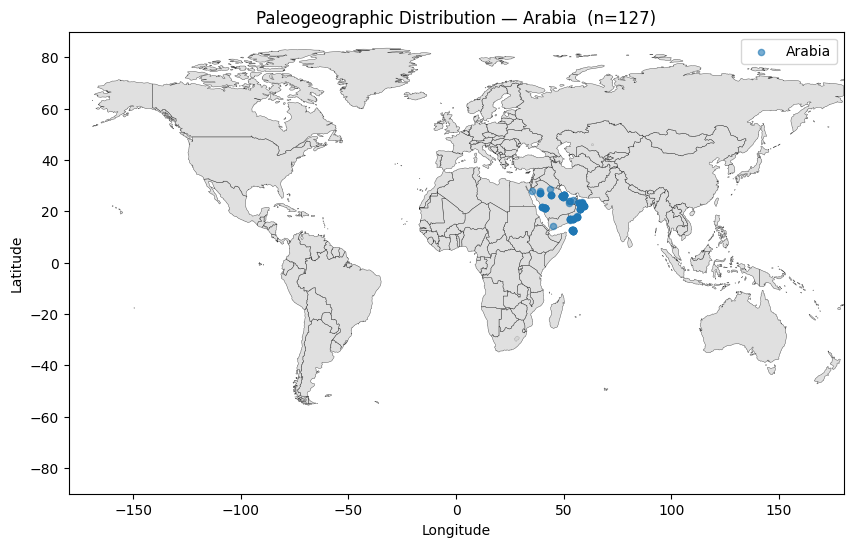

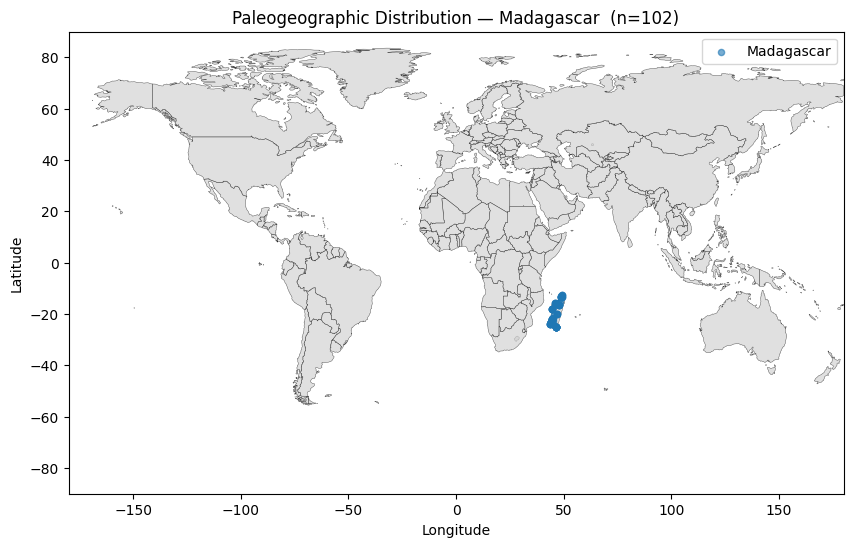

In [13]:
units = pb_records_copy["paleo_unit"].unique()

for unit in units:
    dfu = pb_records_copy[pb_records_copy["paleo_unit"] == unit]
    count = len(dfu)

    plt.figure(figsize=(10,6))
    ax = plt.gca()

    # mapa base
    draw_world(ax)

    # pontos geográficos
    plt.scatter(dfu["lng"], dfu["lat"], s=20, alpha=0.6, label=f"{unit}")

    plt.title(f"Paleogeographic Distribution — {unit}  (n={count})")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()


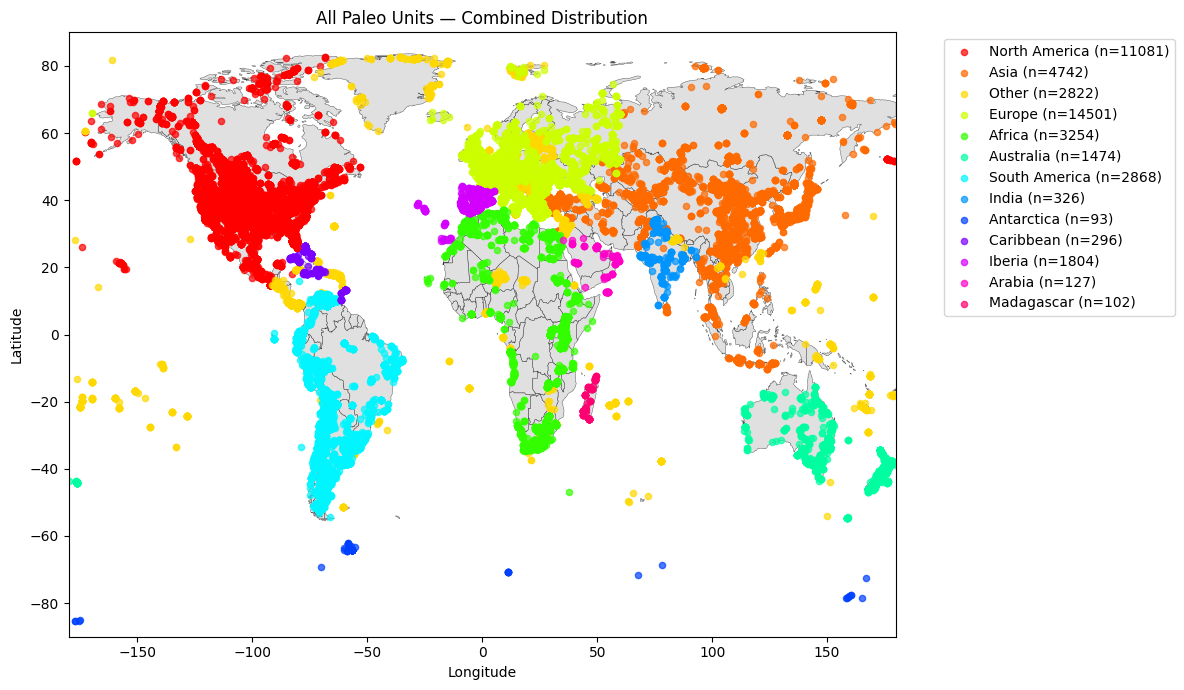

In [14]:
plt.figure(figsize=(12,7))
ax = plt.gca()

draw_world(ax)

bright_colors = [
    "#ff0000", "#ff6a00", "#ffd800", "#ccff00", "#32ff00",
    "#00ffa0", "#00f6ff", "#0095ff", "#0040ff", "#7a00ff",
    "#d400ff", "#ff00c8", "#ff0070"
]

for i, unit in enumerate(units):
    dfu = pb_records_copy[pb_records_copy["paleo_unit"] == unit]
    plt.scatter(
        dfu["lng"],
        dfu["lat"],
        s=20,
        alpha=0.7,
        color=bright_colors[i % len(bright_colors)],  # recicla se tiver mais unidades
        label=f"{unit} (n={len(dfu)})"
    )

plt.title("All Paleo Units — Combined Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


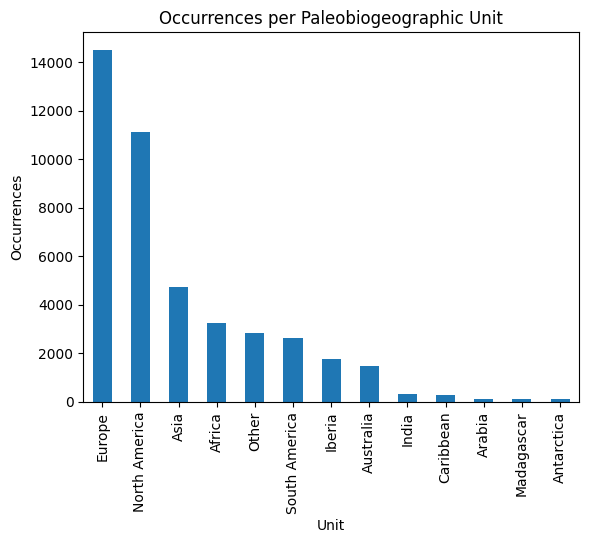

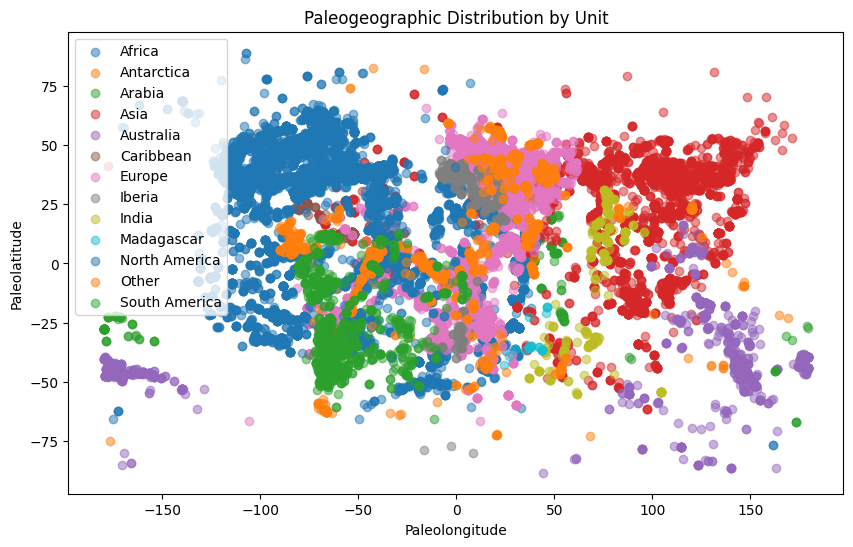

In [ ]:
pb_records_copy["paleo_unit"].value_counts().plot.bar()
plt.title("Occurrences per Paleobiogeographic Unit")
plt.xlabel("Unit")
plt.ylabel("Occurrences")
plt.show()

plt.figure(figsize=(10,6))
for unit, dfu in pb_records_copy.groupby("paleo_unit"):
    plt.scatter(dfu["pln"], dfu["pla"], label=unit, alpha=0.5)

plt.title("Paleogeographic Distribution by Unit")
plt.xlabel("Paleolongitude")
plt.ylabel("Paleolatitude")
plt.legend()
plt.show()



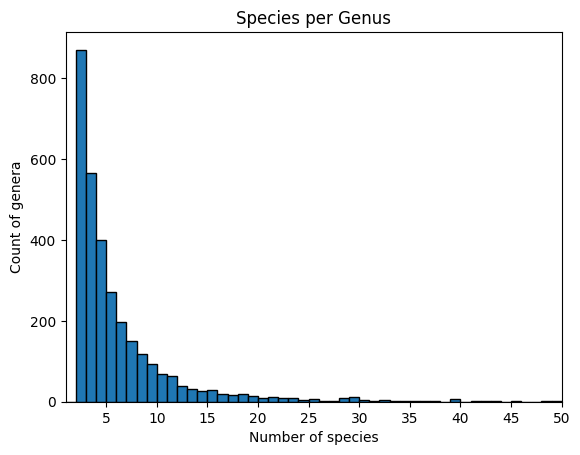

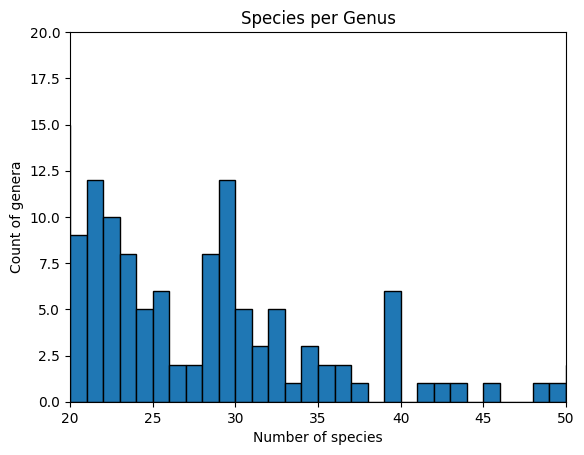

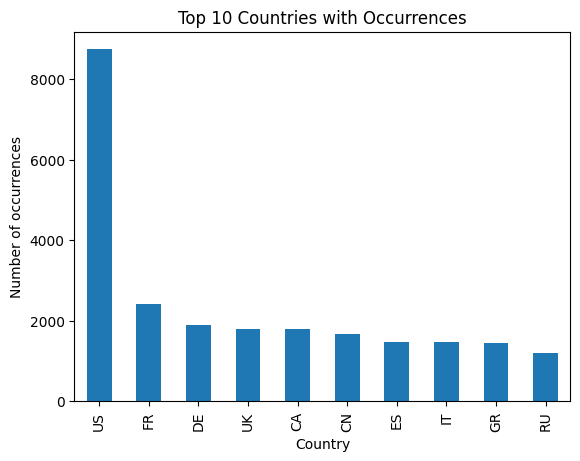

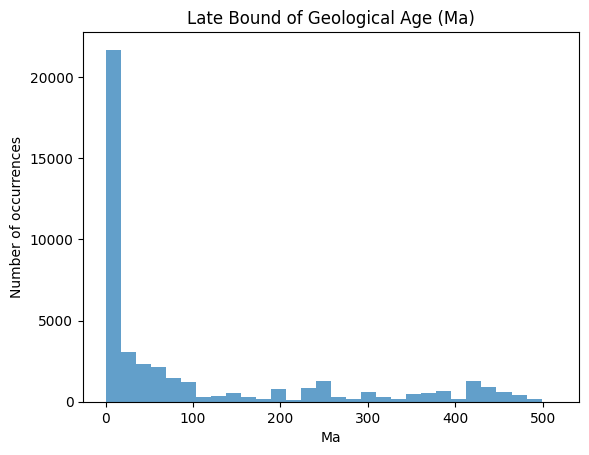

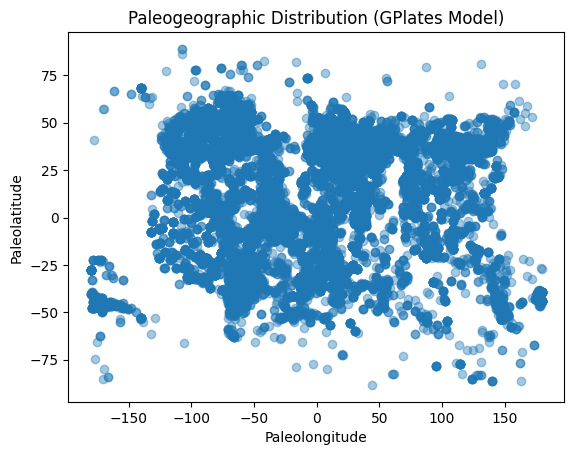

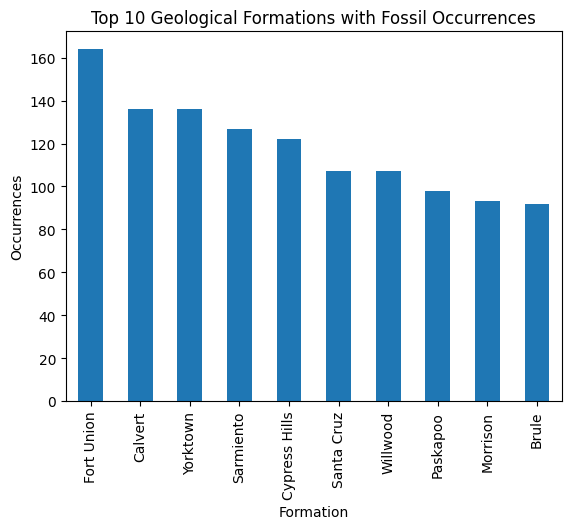

In [ ]:
########################################################################
# ========================   VISUALIZAÇÕES   ===========================
########################################################################


# ===================================================================
# A) HISTOGRAMA — Número de espécies por género
# Extra para mais informacao, fazer logartimo das ordenadas e detalhe do 10-50 (genus)
# ===================================================================

species_per_genus = pb_records_copy.groupby('gnl')['ids'].nunique()

plt.hist(species_per_genus, bins=range(1, 52), edgecolor='black')
plt.title("Species per Genus")
plt.xlabel("Number of species")
plt.ylabel("Count of genera")
plt.xticks(range(0, 51, 5))
plt.xlim(1, 50)
plt.show()

plt.hist(species_per_genus, bins=range(1, 52), edgecolor='black')
plt.title("Species per Genus")
plt.xlabel("Number of species")
plt.ylabel("Count of genera")
plt.xticks(range(0, 51, 5))
plt.xlim(20, 50)
plt.ylim(0, 20)
plt.show()

# ===================================================================
# B) TOP 10 COUNTRIES BY NUMBER OF OCCURRENCES
# Juntar por placas paleobiogeograficas, e fazer separacao da russia por longitude
# ===================================================================

country_counts = pb_records_copy['cc2'].value_counts().head(10)
country_counts.plot.bar()
plt.title("Top 10 Countries with Occurrences")
plt.xlabel("Country")
plt.ylabel("Number of occurrences")
plt.show()



# ===================================================================
# C) DISTRIBUIÇÃO DO LIMITE TARDIO (LAG)
# ===================================================================

pb_records_copy["lag"].plot.hist(bins=30, alpha=0.7)
plt.title("Late Bound of Geological Age (Ma)")
plt.xlabel("Ma")
plt.ylabel("Number of occurrences")
plt.show()



# ===================================================================
# D) DISTRIBUIÇÃO PALEOGEOGRÁFICA (modelo gplates)
# ===================================================================

gplates = pb_records_copy[pb_records_copy["pm1"] == "gplates"]

plt.scatter(gplates["pln"], gplates["pla"], alpha=0.4)
plt.title("Paleogeographic Distribution (GPlates Model)")
plt.xlabel("Paleolongitude")
plt.ylabel("Paleolatitude")
plt.show()



# ===================================================================
# E) TOP 10 GEOLOGICAL FORMATIONS
# ===================================================================

formation_counts = pb_records_copy["sfm"].value_counts().head(10)
formation_counts.plot.bar()
plt.title("Top 10 Geological Formations with Fossil Occurrences")
plt.xlabel("Formation")
plt.ylabel("Occurrences")
plt.show()


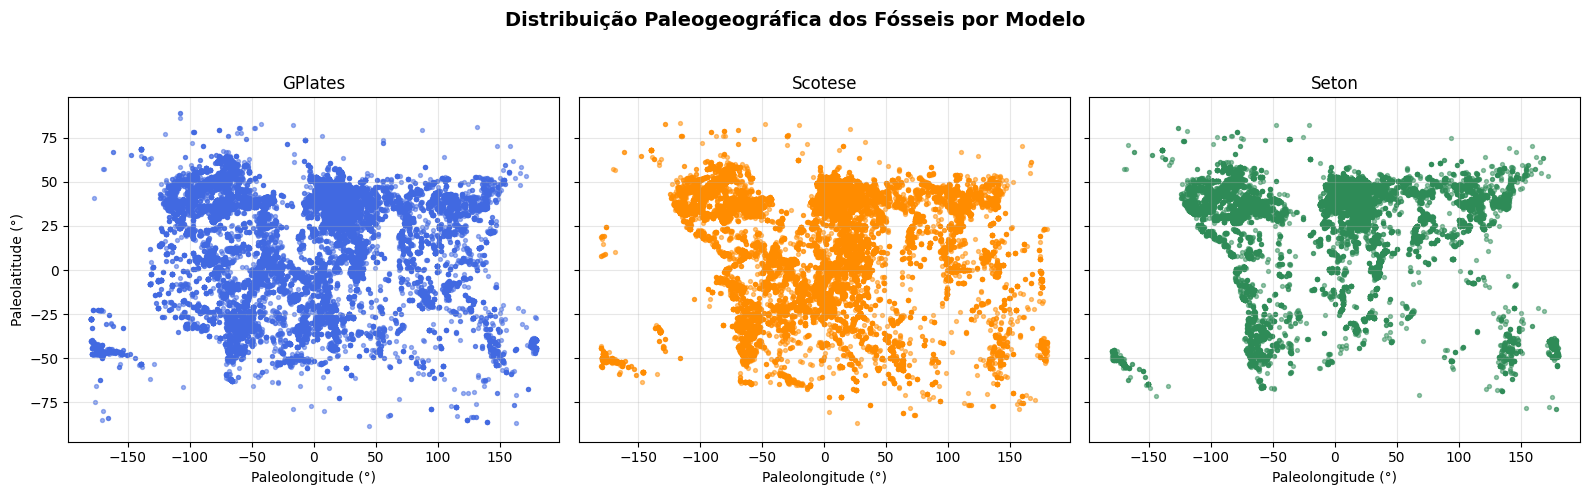

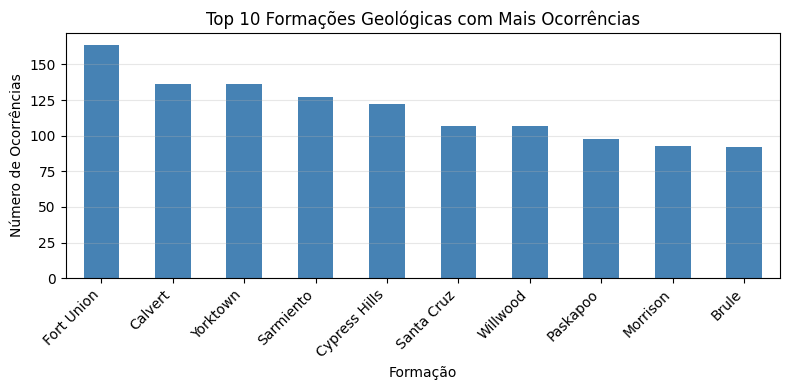

In [ ]:
# -------------------------------------------------------------
# 1. LOADING FINAL FILTERED DATA (assume pb_records_copy exists)
# -------------------------------------------------------------
# If needed, replace with your loading step:
# pb_records_copy = pd.read_json("pbdb_filtered.json")

# -------------------------------------------------------------
# 2. PALEOGEOGRAPHIC DISTRIBUTION BY MODEL
# -------------------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

# --- Modelo GPlates ---
subset_gplates = pb_records_copy[pb_records_copy["pm1"] == "gplates"]

axes[0].scatter(subset_gplates["pln"], subset_gplates["pla"],
                alpha=0.5, s=8, color="royalblue")
axes[0].set_title("GPlates")
axes[0].set_xlabel("Paleolongitude (°)")
axes[0].set_ylabel("Paleolatitude (°)")
axes[0].grid(True, alpha=0.3)

# --- Modelo Scotese ---
subset_scotese = pb_records_copy[pb_records_copy["pm2"] == "scotese"]

axes[1].scatter(subset_scotese["pln2"], subset_scotese["pla2"],
                alpha=0.5, s=8, color="darkorange")
axes[1].set_title("Scotese")
axes[1].set_xlabel("Paleolongitude (°)")
axes[1].grid(True, alpha=0.3)

# --- Modelo Seton (se existir) ---
if "pm3" in pb_records_copy.columns and "pln3" in pb_records_copy.columns:
    subset_seton = pb_records_copy[pb_records_copy["pm3"] == "seton"]

    axes[2].scatter(subset_seton["pln3"], subset_seton["pla3"],
                    alpha=0.5, s=8, color="seagreen")
    axes[2].set_title("Seton")
    axes[2].set_xlabel("Paleolongitude (°)")
    axes[2].grid(True, alpha=0.3)
else:
    axes[2].axis("off")

# Title
fig.suptitle("Distribuição Paleogeográfica dos Fósseis por Modelo",
             fontsize=14, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -------------------------------------------------------------
# 3. TOP 10 GEOLOGICAL FORMATIONS
# -------------------------------------------------------------

formation_counts = pb_records_copy["sfm"].value_counts().head(10)

plt.figure(figsize=(8, 4))
formation_counts.plot.bar(color="steelblue")
plt.title("Top 10 Formações Geológicas com Mais Ocorrências")
plt.xlabel("Formação")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()